In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
data_dir = '../../../data/' # adjust to the proper directory
trapnell = spu.get_psi_table(data_dir+'trapnell/Trapnell_SJ_counts_all.tab', minJR=1, minCell=1, drop_duplicates = False)
chen = spu.get_psi_table('chen_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
das = spu.get_psi_table('das_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
song = spu.get_psi_table(data_dir+'song/Song_SJ_counts.tab', minJR=1, minCell=1, drop_duplicates = False)
lescroart = spu.get_psi_table('lescroart_SJ_counts_unique_map.tab', minJR=1, minCell=1, drop_duplicates = False)
shalek = spu.get_psi_table('shalek_SJ_counts_new_annotation.tab', minJR=1, minCell=1, drop_duplicates = False)

In [9]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

In [5]:
if not os.path.exists('plots_review'):
    os.makedirs('plots_review')
    
if not os.path.exists('plots_review/figure1'):
    os.makedirs('plots_review/figure1')
    os.makedirs('plots_review/figure2')
    os.makedirs('plots_review/figure3')
    os.makedirs('plots_review/figure3/events/')

In [6]:
chen_hist_complete, chen_hist_intermediate = scp.get_bins_table(chen[3], chen[4], nbins=15)
trapnell_hist_complete, trapnell_hist_intermediate = scp.get_bins_table(trapnell[3], trapnell[4], nbins=15)
song_hist_complete, song_hist_intermediate = scp.get_bins_table(song[3], song[4], nbins=15)
das_hist_complete, das_hist_intermediate = scp.get_bins_table(das[3], das[4], nbins=15)
lescroart_hist_complete, lescroart_hist_intermediate = scp.get_bins_table(lescroart[3], lescroart[4], nbins=15)
shalek_hist_complete, shalek_hist_intermediate = scp.get_bins_table(shalek[3], shalek[4], nbins=15)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


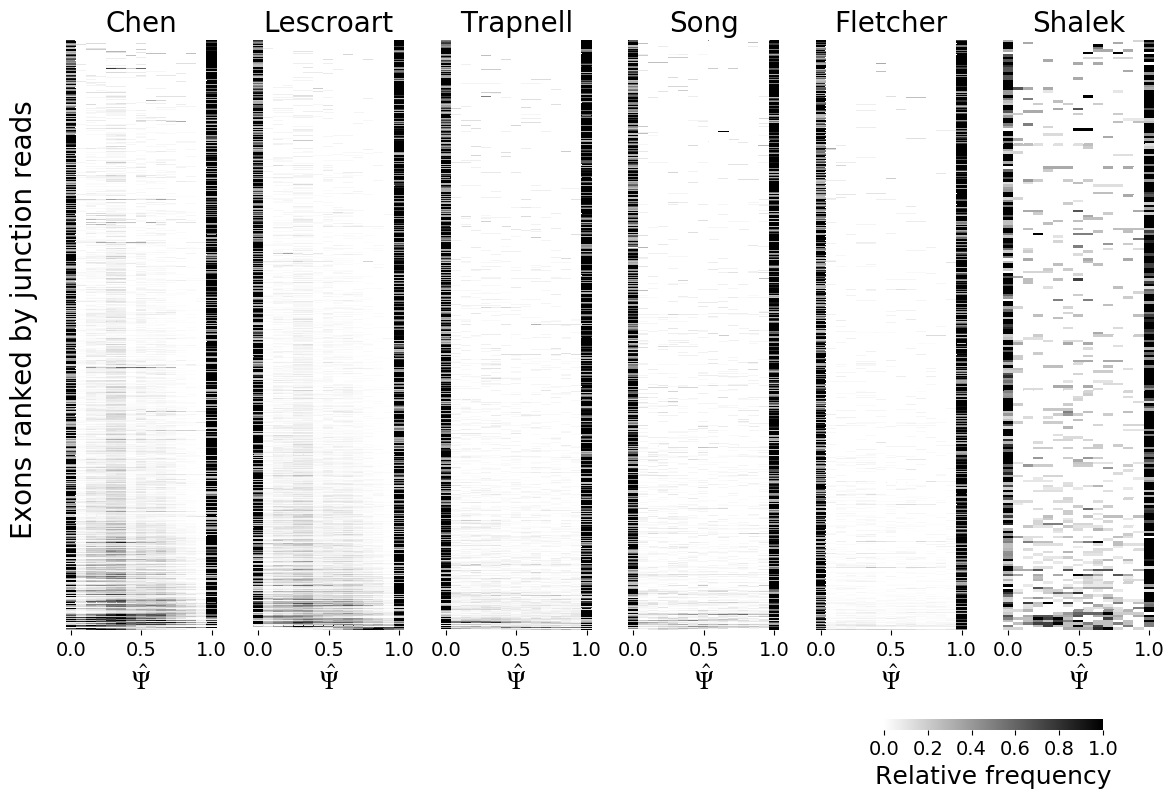

In [10]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [chen_hist_intermediate, lescroart_hist_intermediate, trapnell_hist_intermediate,
             song_hist_intermediate, das_hist_intermediate,  shalek_hist_intermediate]

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Fletcher', 'Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'PSI_distributions',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=15)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


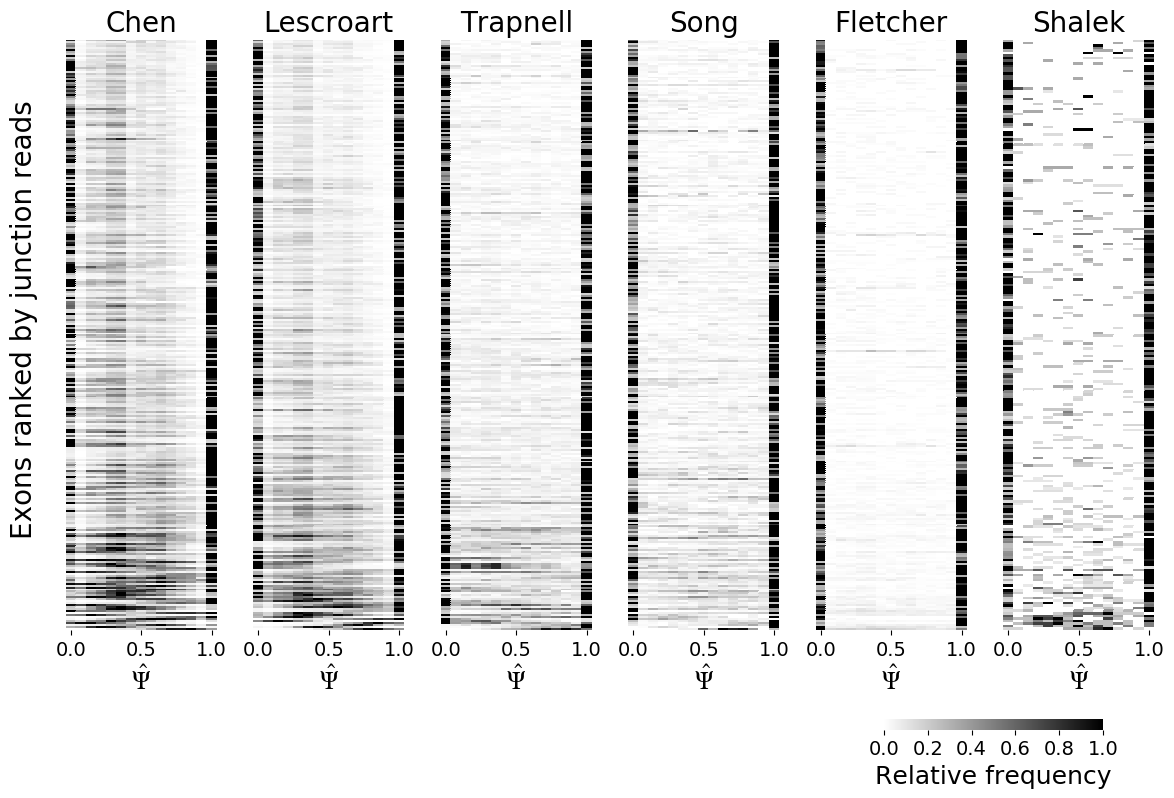

In [11]:
hist_list_300 = [x.loc[x.index[-300:]] for x in hist_list]
#scp.plot_histograms(hist_list_300, dset_name_list,fig_len=15, plot_name = 'PSI_distributions_top300')

scp.plot_histograms(hist_list_300, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'PSI_distributions_top300',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=15)

plt.show()

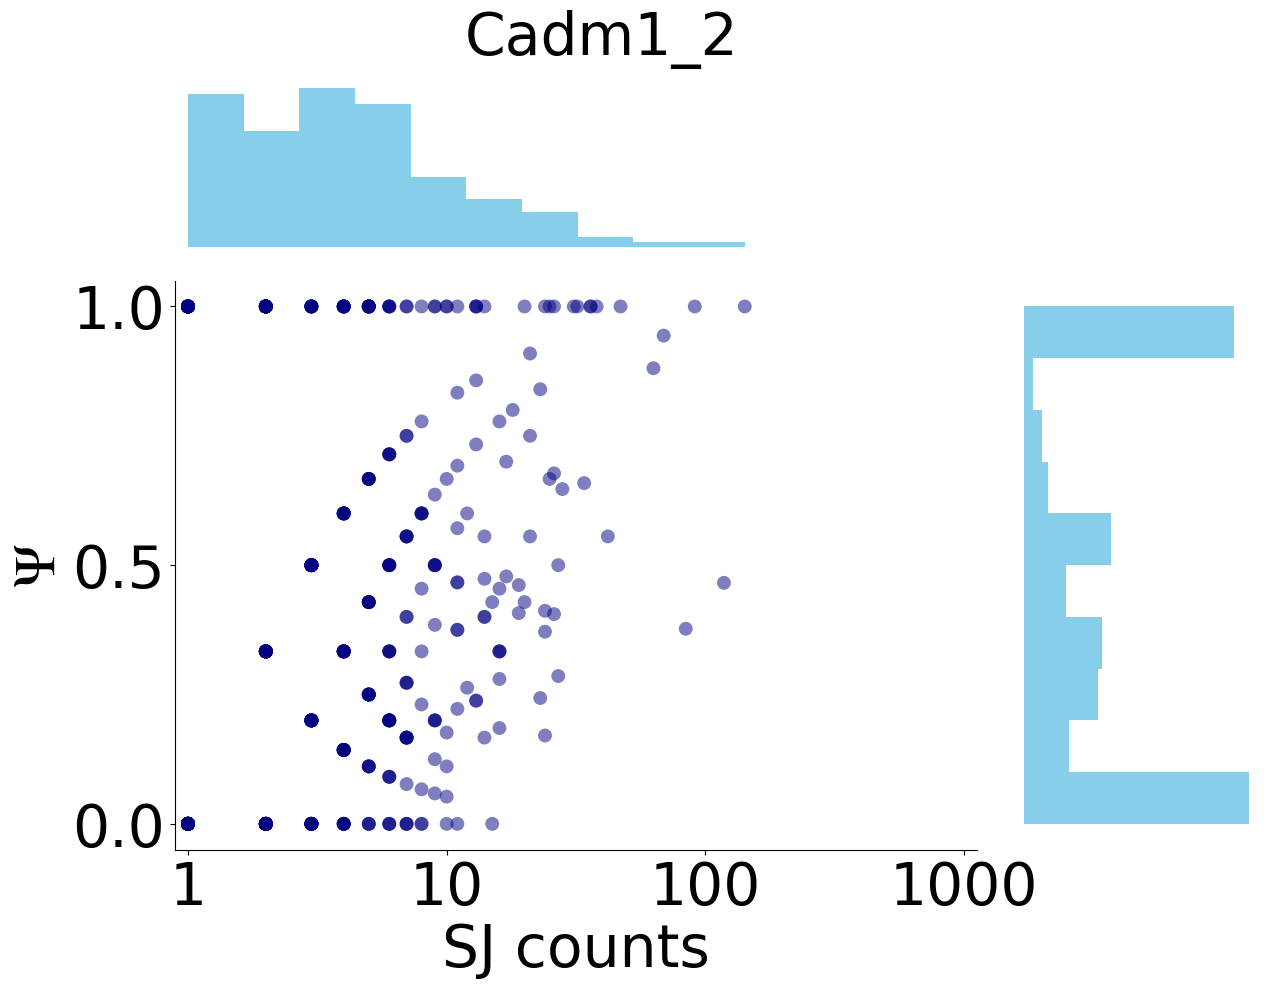

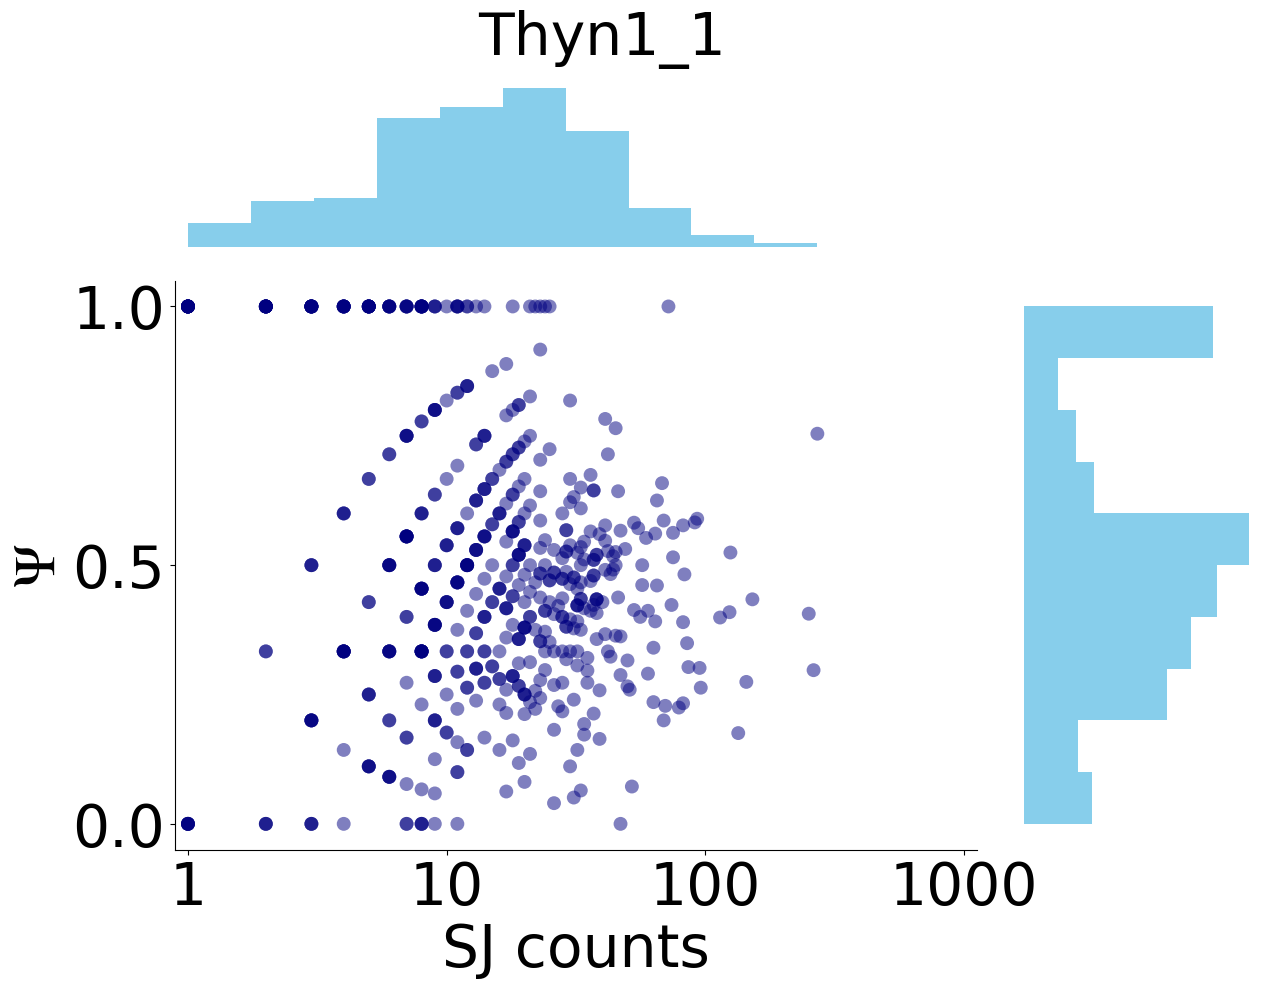

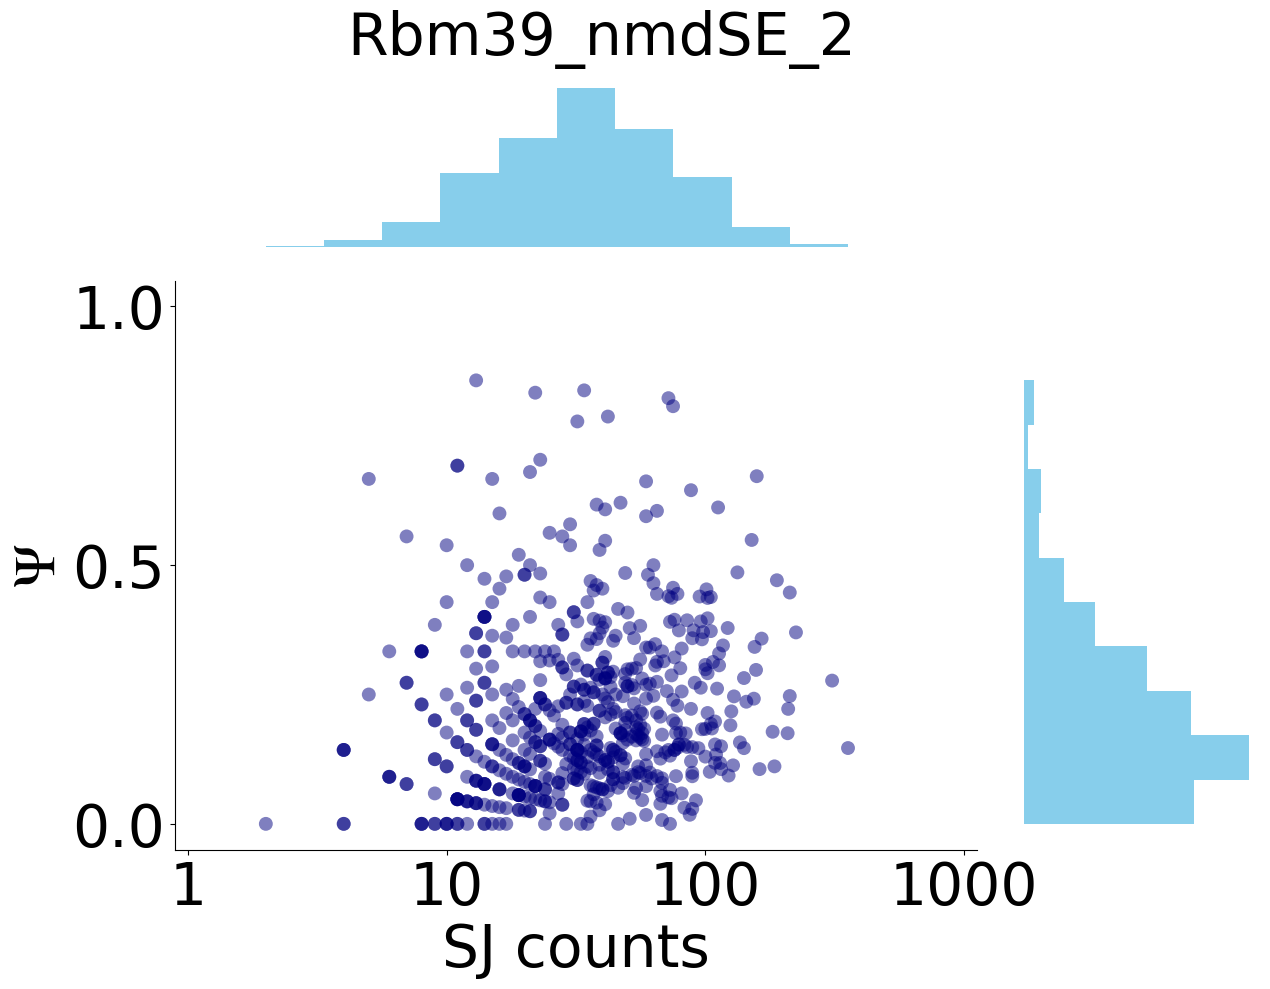

In [45]:
scp.plot_event(chen[3], chen[4], 'chen', 'Cadm1_2', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots_review/figure1/', just_show=True)

scp.plot_event(chen[3], chen[4], 'chen', 'Thyn1_1', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots_review/figure1/', just_show=True)

scp.plot_event(chen[3], chen[4], 'chen', 'Rbm39_nmdSE_2', xtags = [1, 10, 100, 1000],
               plot_dir = 'plots_review/figure1/', just_show=True)

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

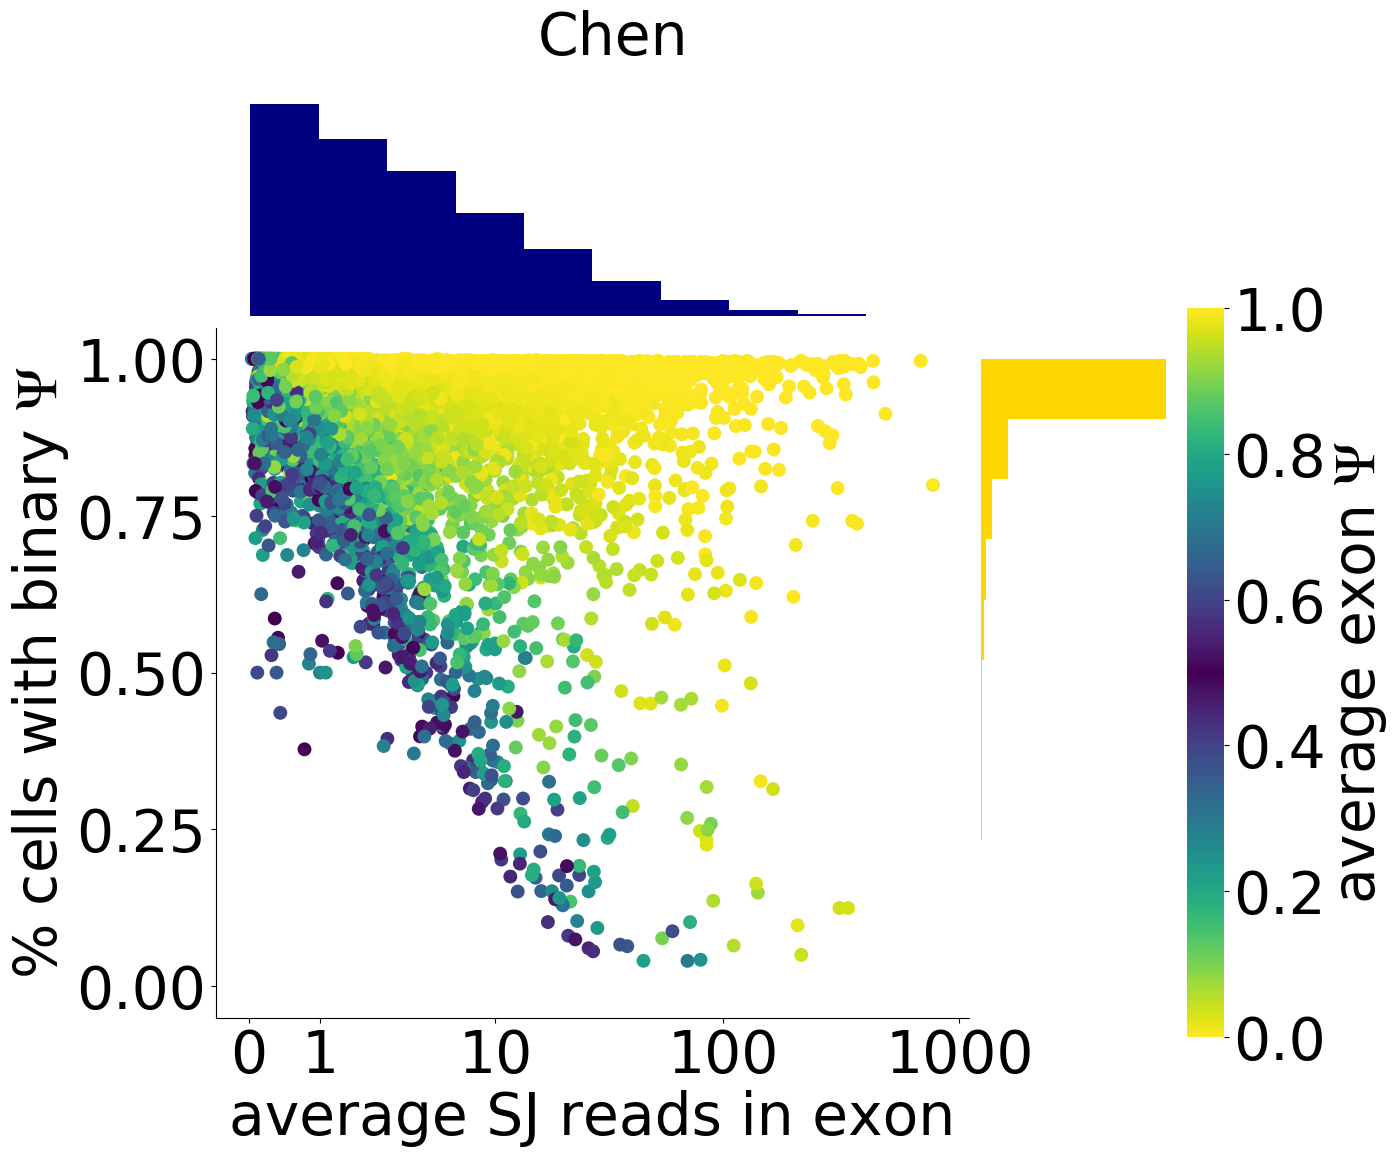

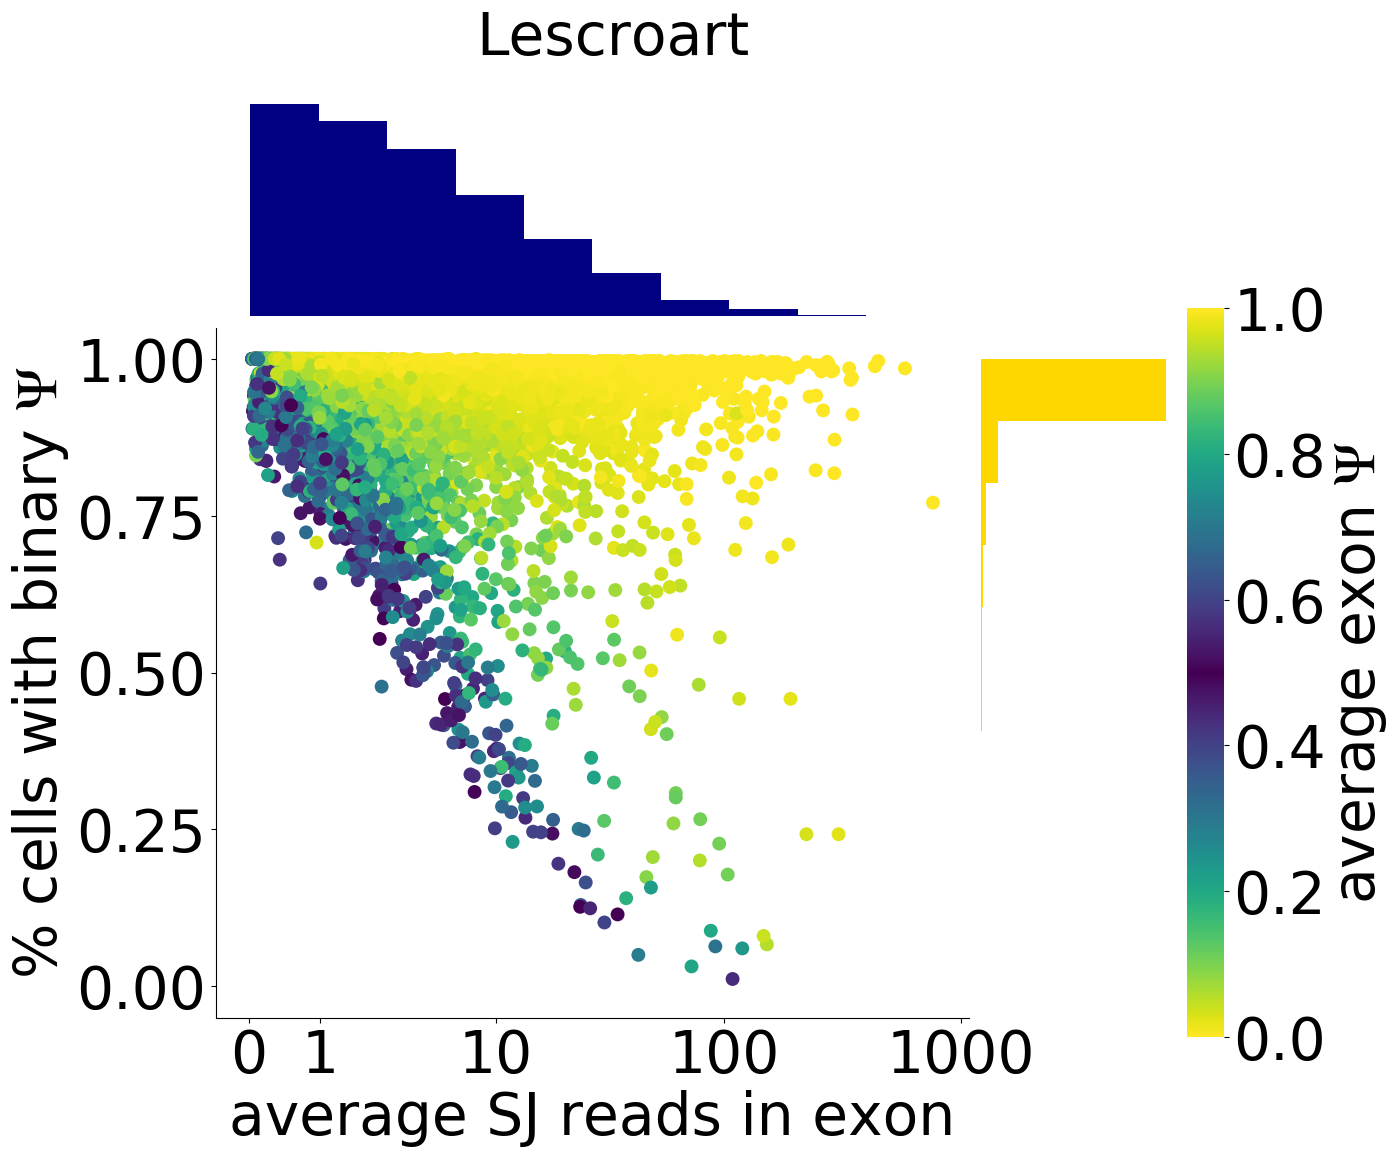

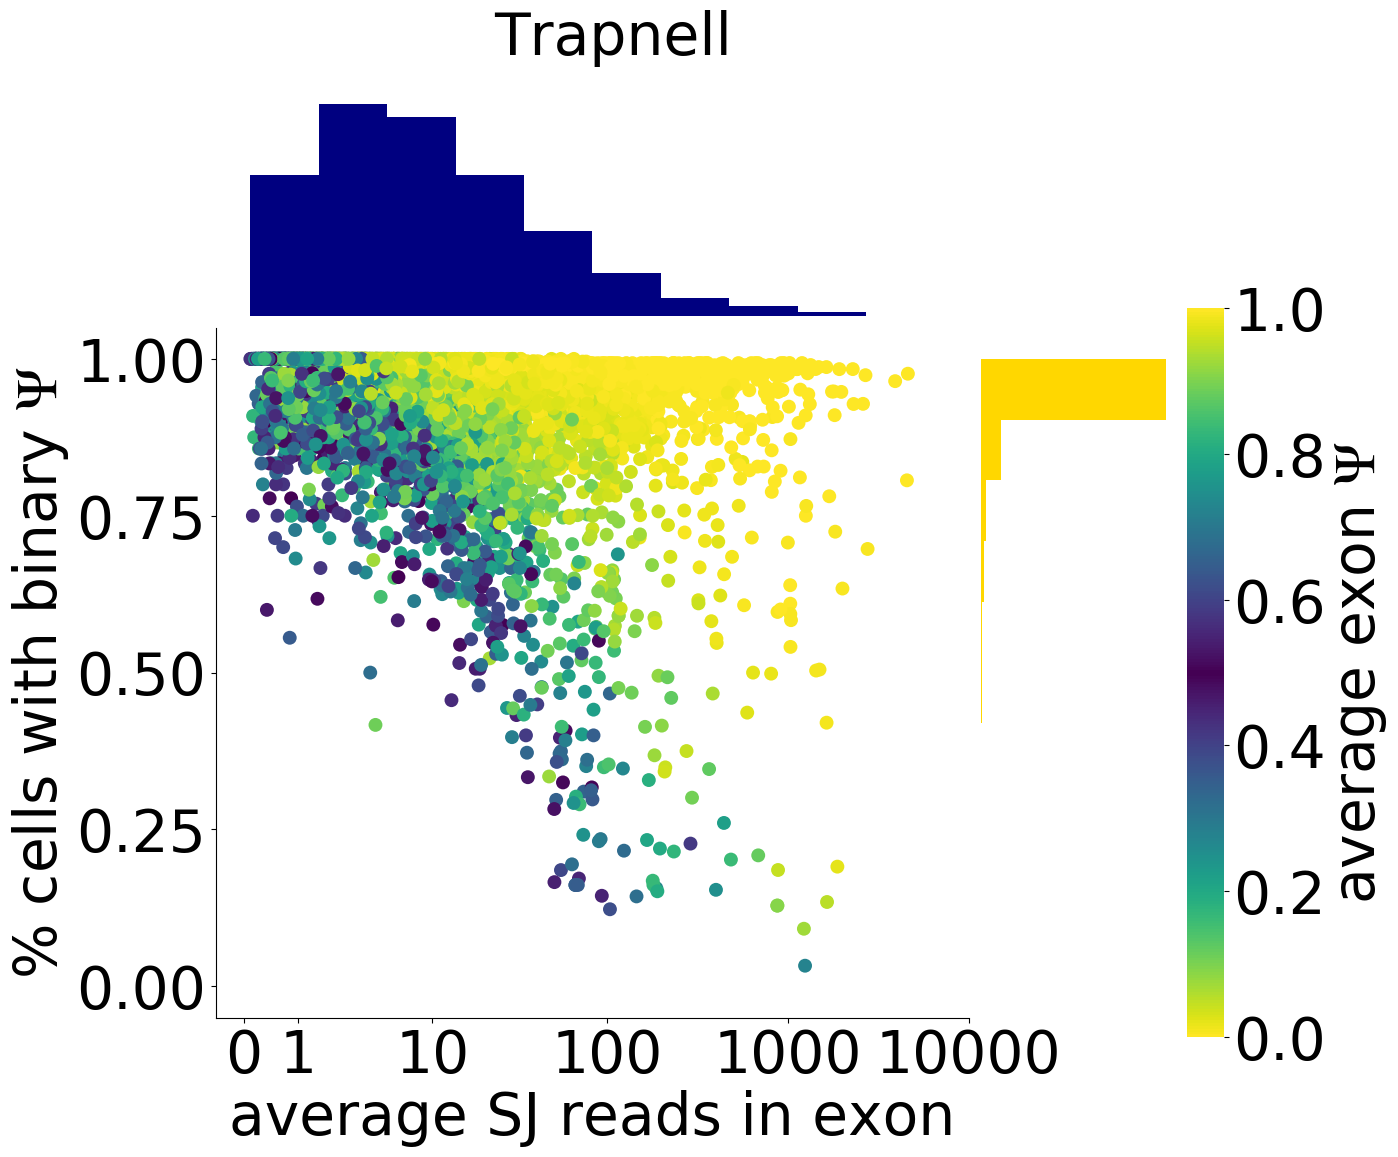

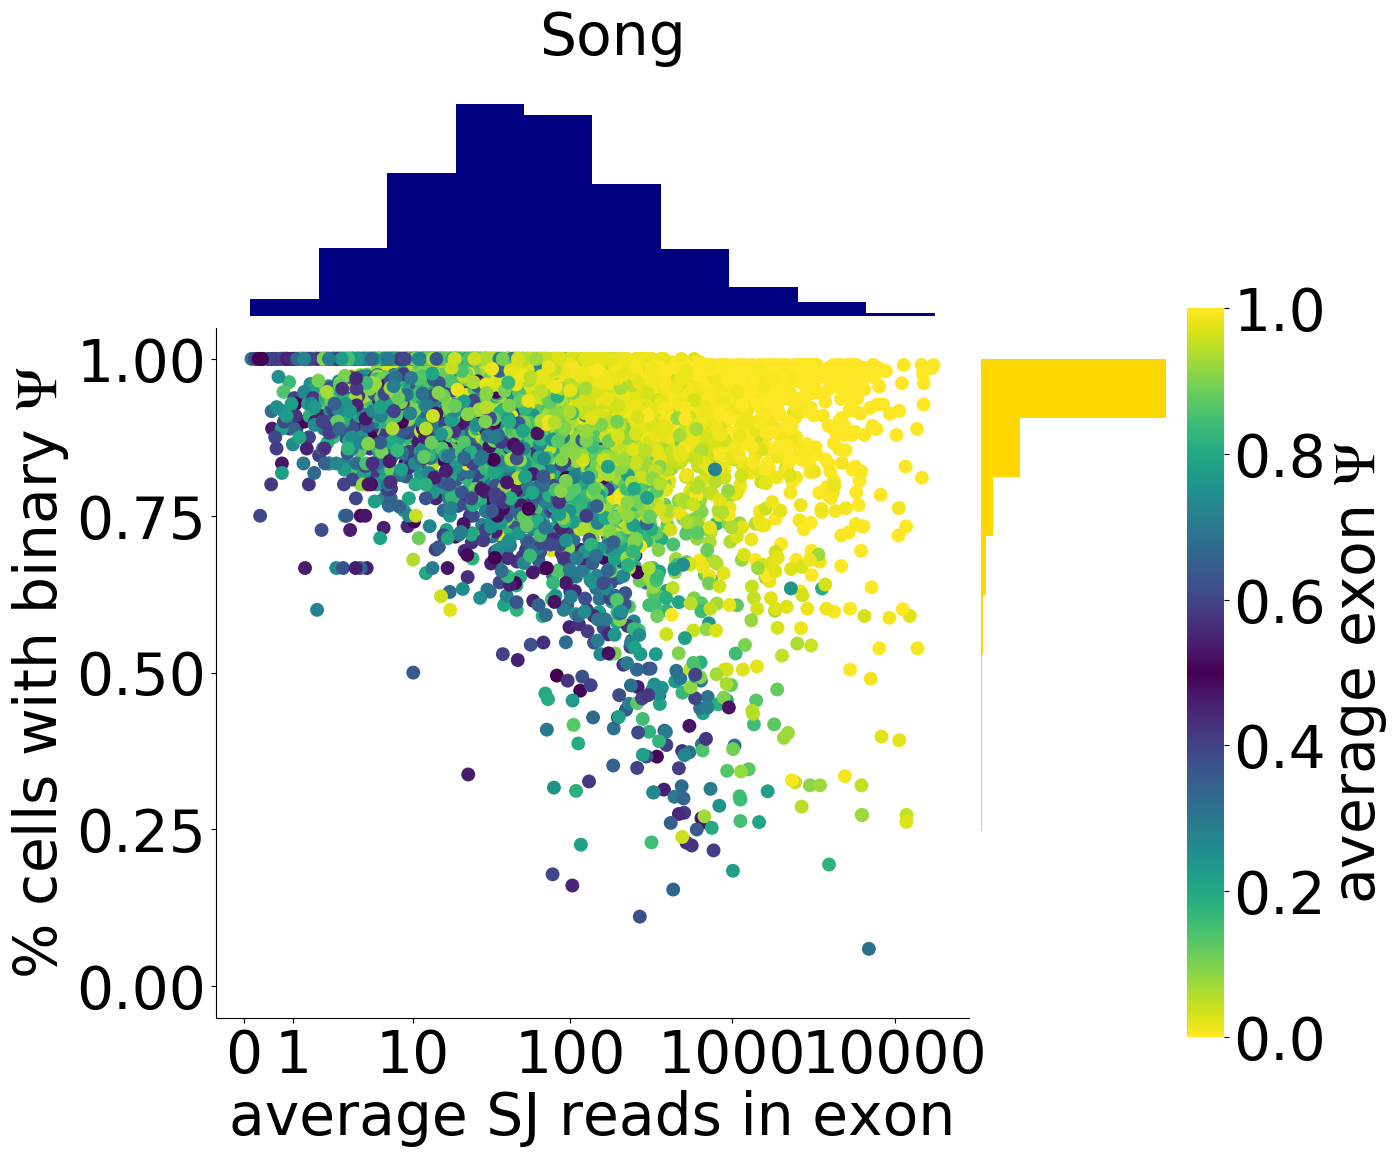

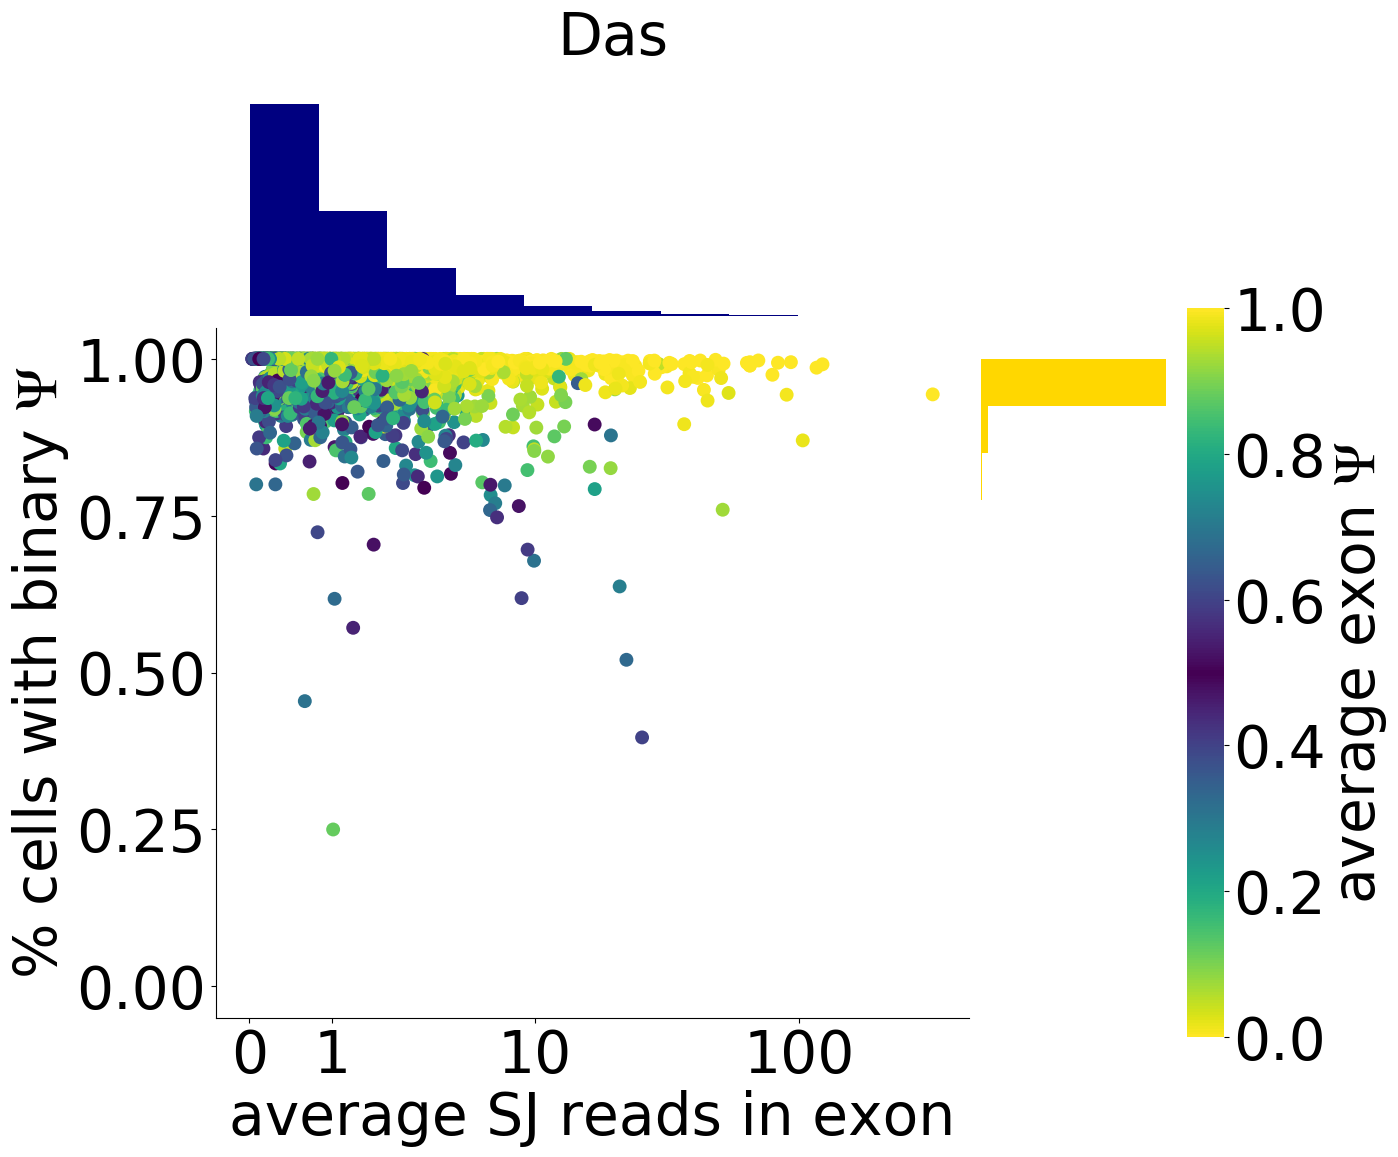

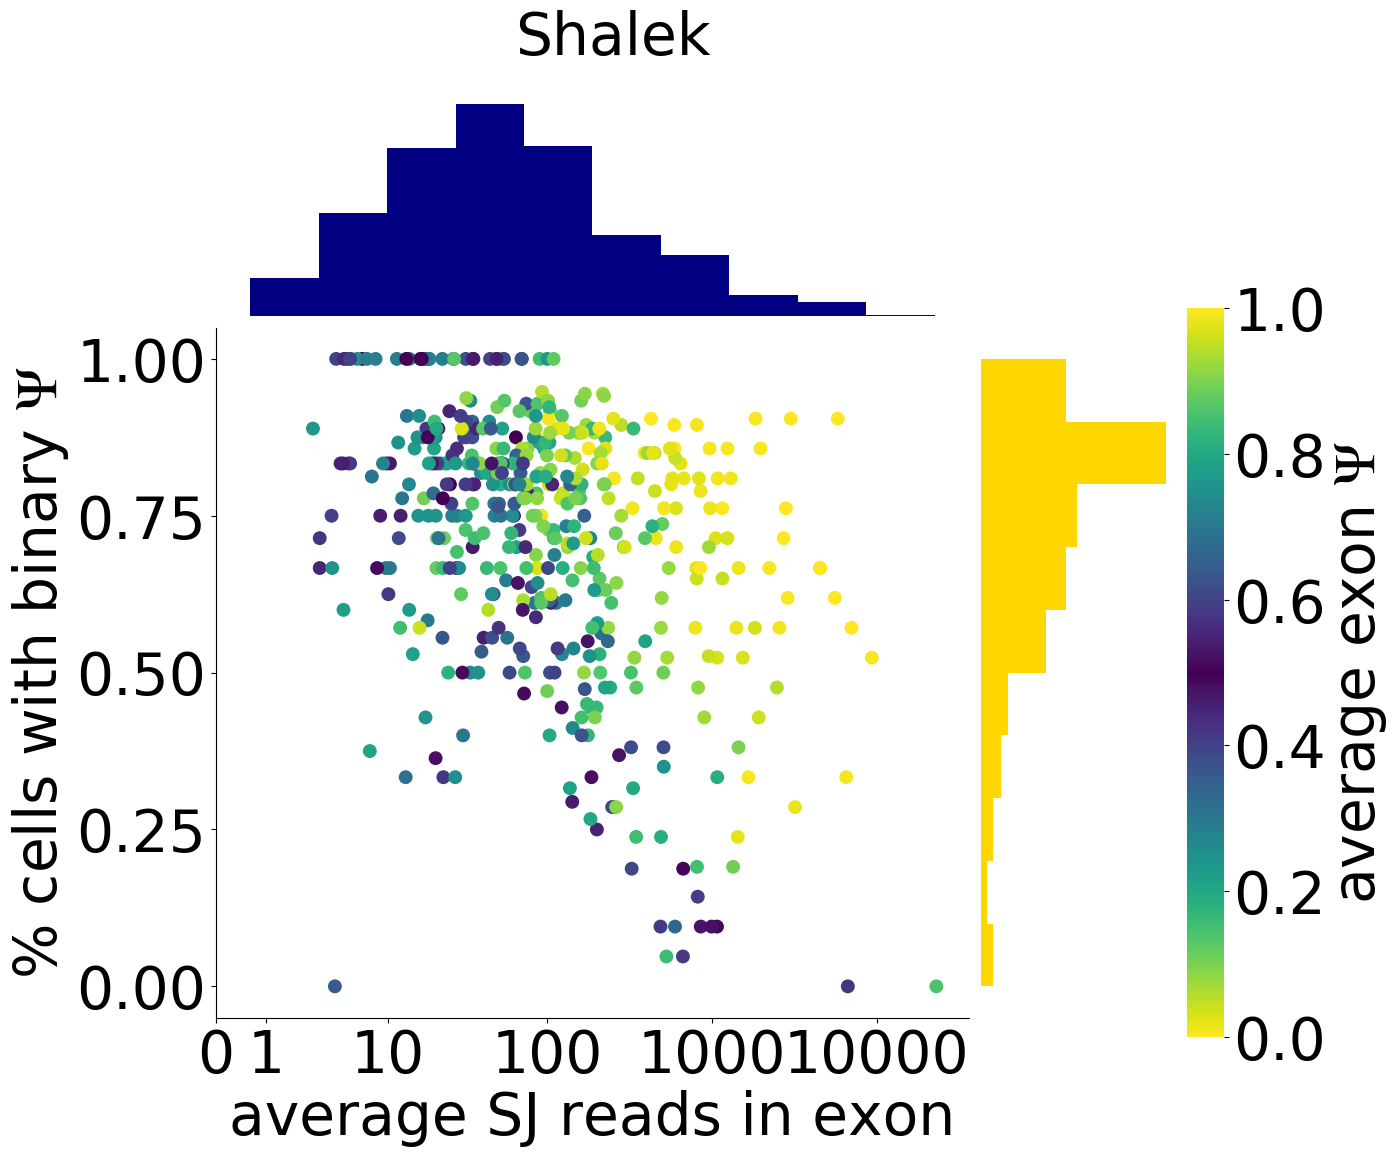

In [16]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(13, 12)

xlocations=[0, 1, 10, 100, 1000]

scp.plot_ase_expression_v_binary(chen[3], chen[4], 'Chen', 'chen_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon',
                              plot_dir = 'plots_review/figure1/', just_show=False)

plt.show()

scp.plot_ase_expression_v_binary(lescroart[3], lescroart[4], 'Lescroart', 'lescroart_all_exons', 
                                 xlocations=xlocations, xlabel='average SJ reads in exon', 
                              plot_dir = 'plots_review/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100, 1000, 10000]
scp.plot_ase_expression_v_binary(trapnell[3], trapnell[4], 'Trapnell', 'trapnell_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots_review/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100, 1000, 10000]
scp.plot_ase_expression_v_binary(song[3], song[4], 'Song', 'song_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots_review/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100]
scp.plot_ase_expression_v_binary(das[3], das[4], 'Das', 'das_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots_review/figure1/', just_show=False)
plt.show()

xlocations=[0, 1, 10, 100, 1000, 10000]
scp.plot_ase_expression_v_binary(shalek[3], shalek[4], 'Shalek', 'shalek_all_exons', xlocations=xlocations,
                                 xlabel='average SJ reads in exon', 
                              plot_dir = 'plots_review/figure1/', just_show=False)
plt.show()


/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

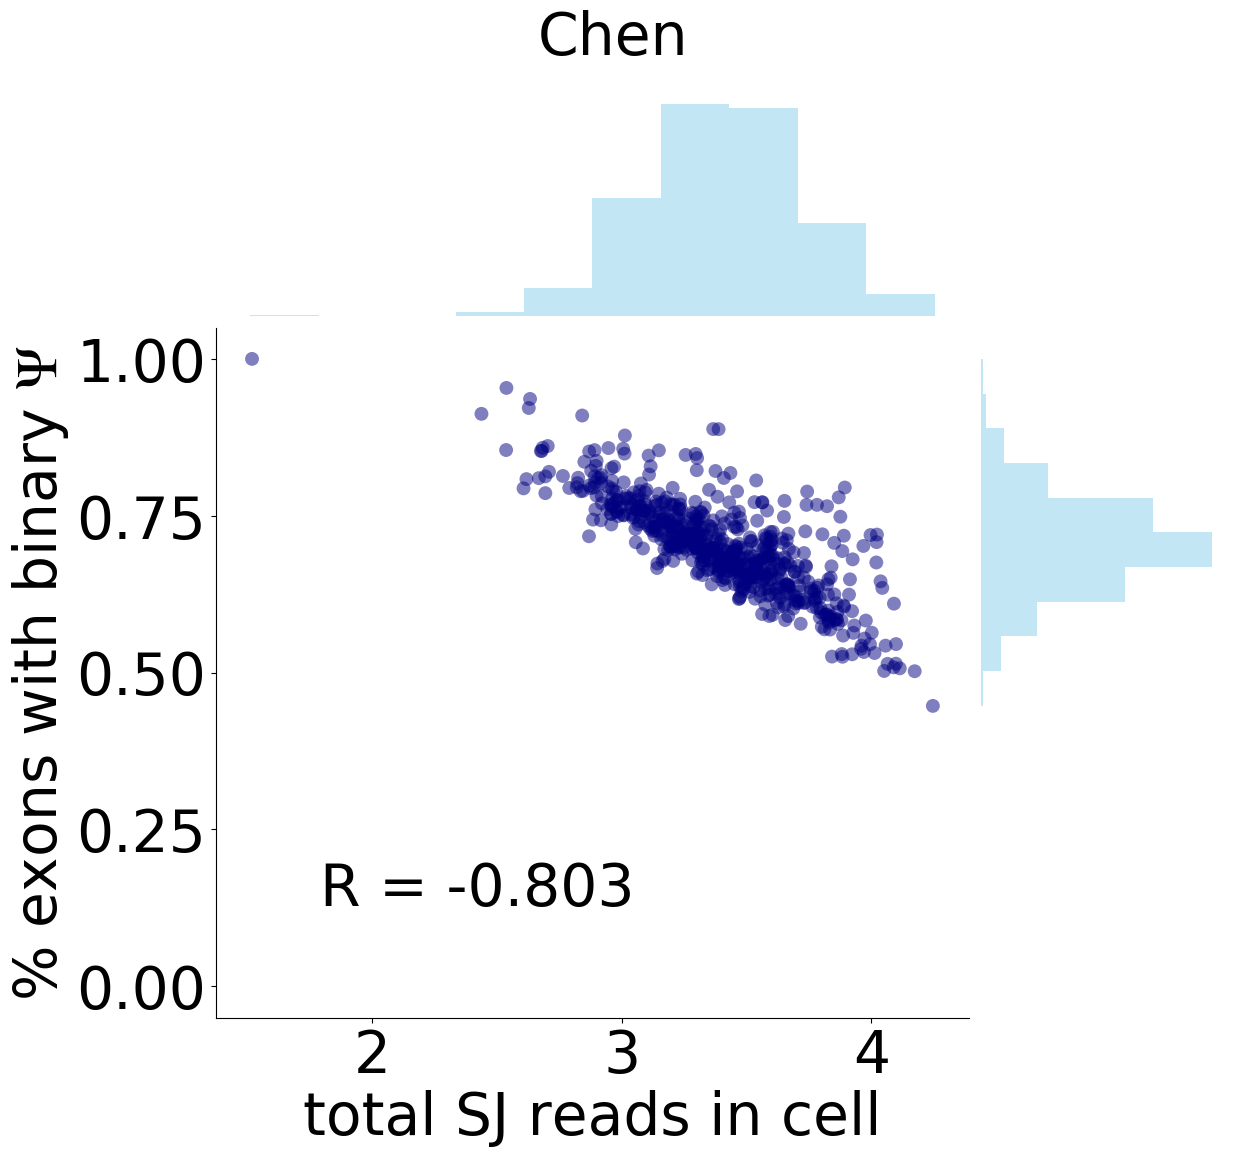

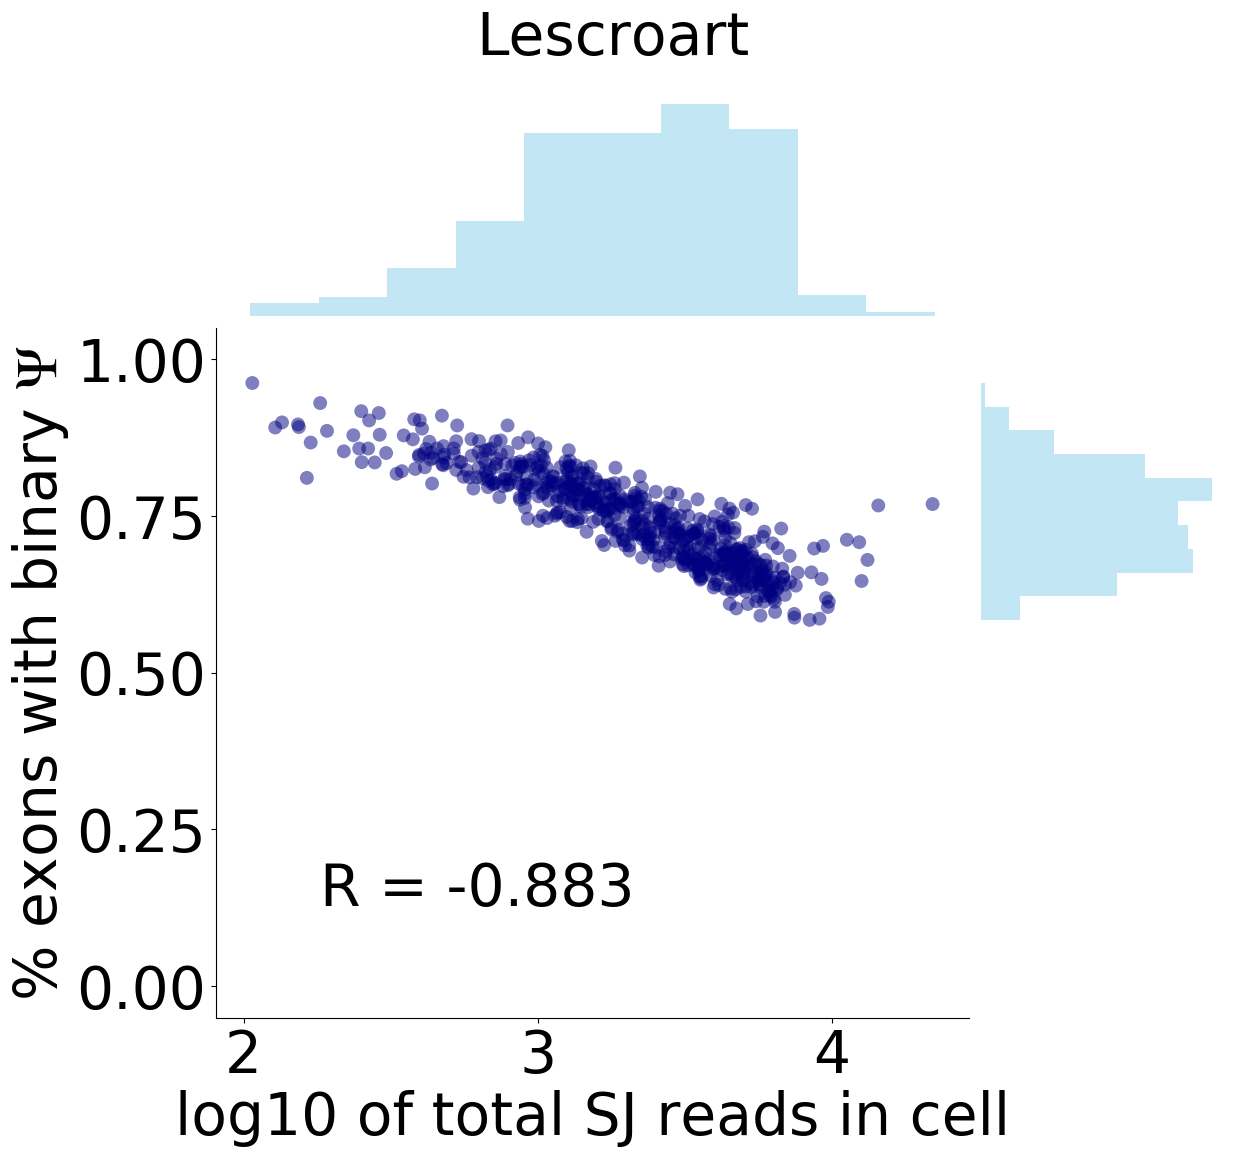

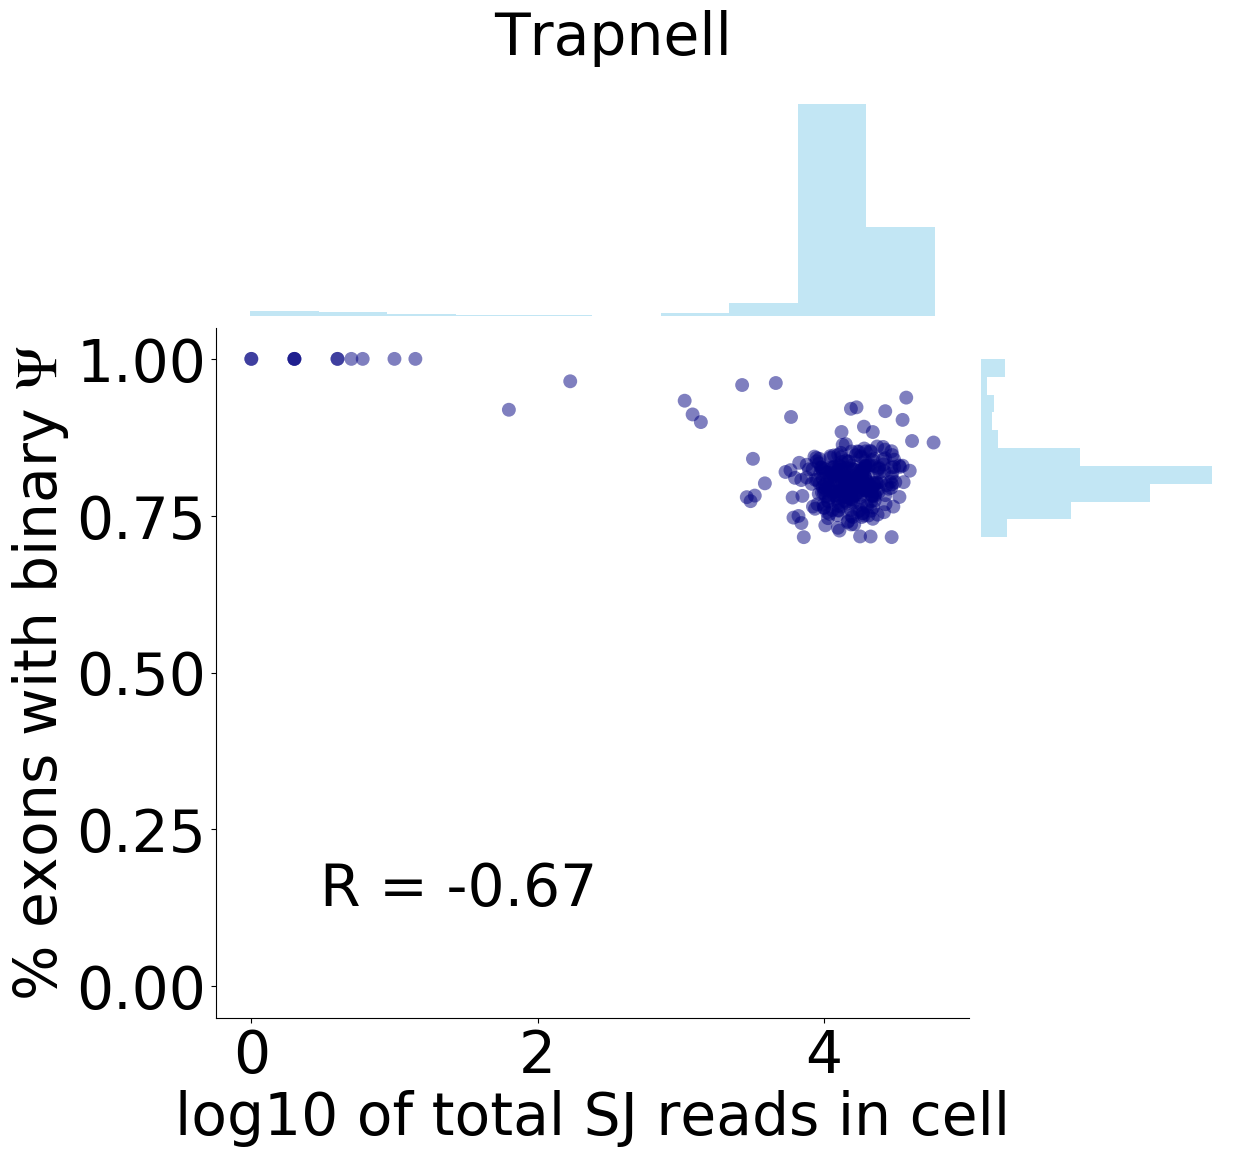

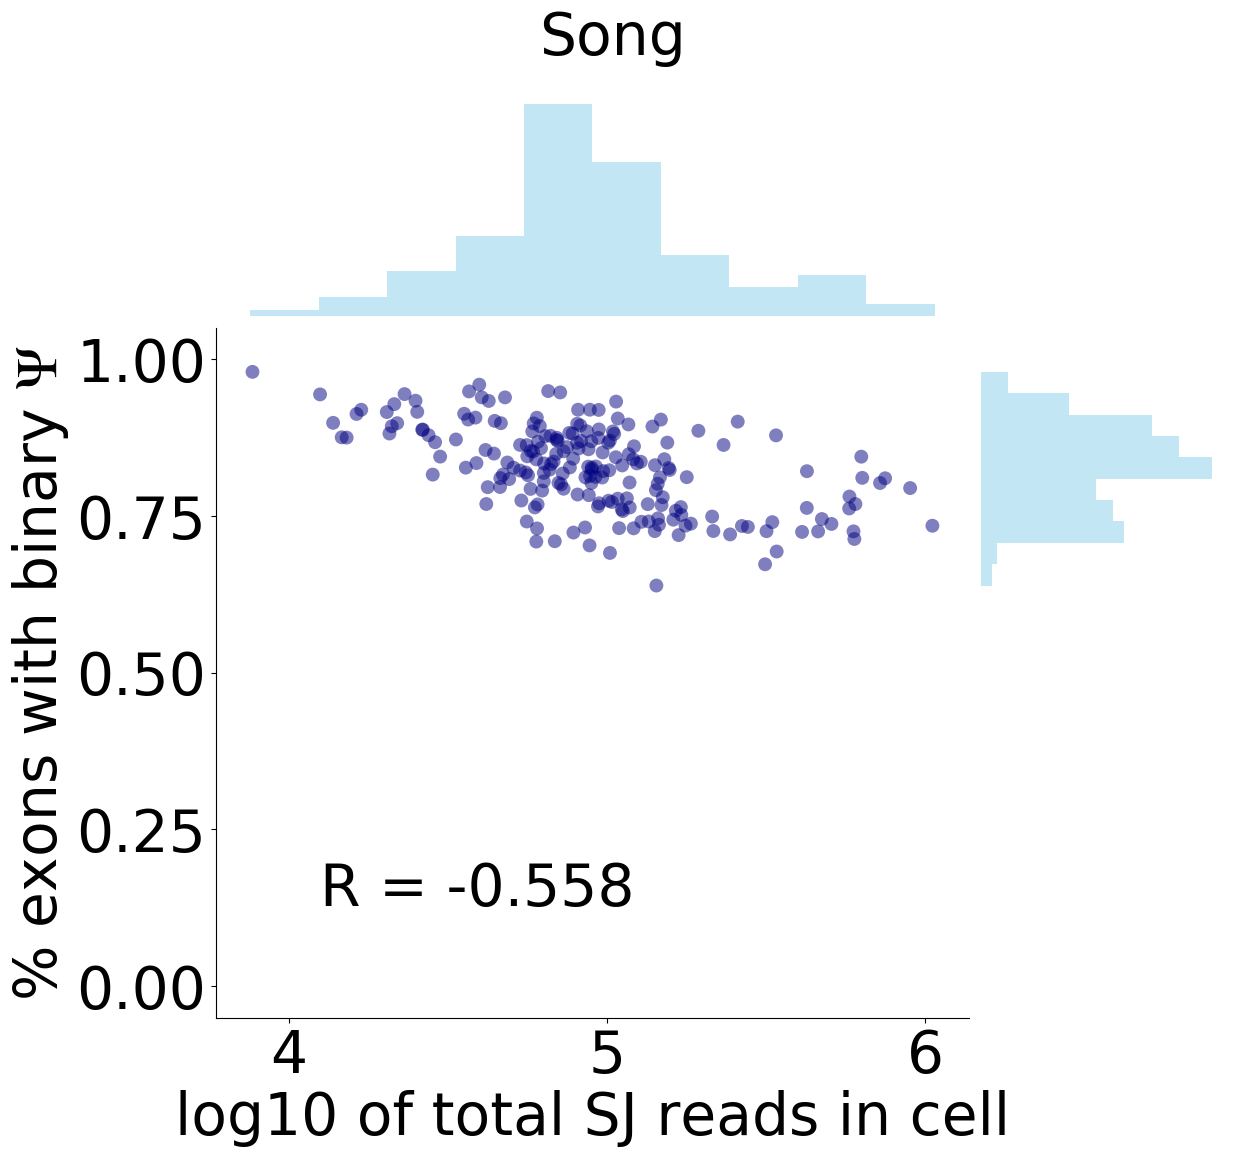

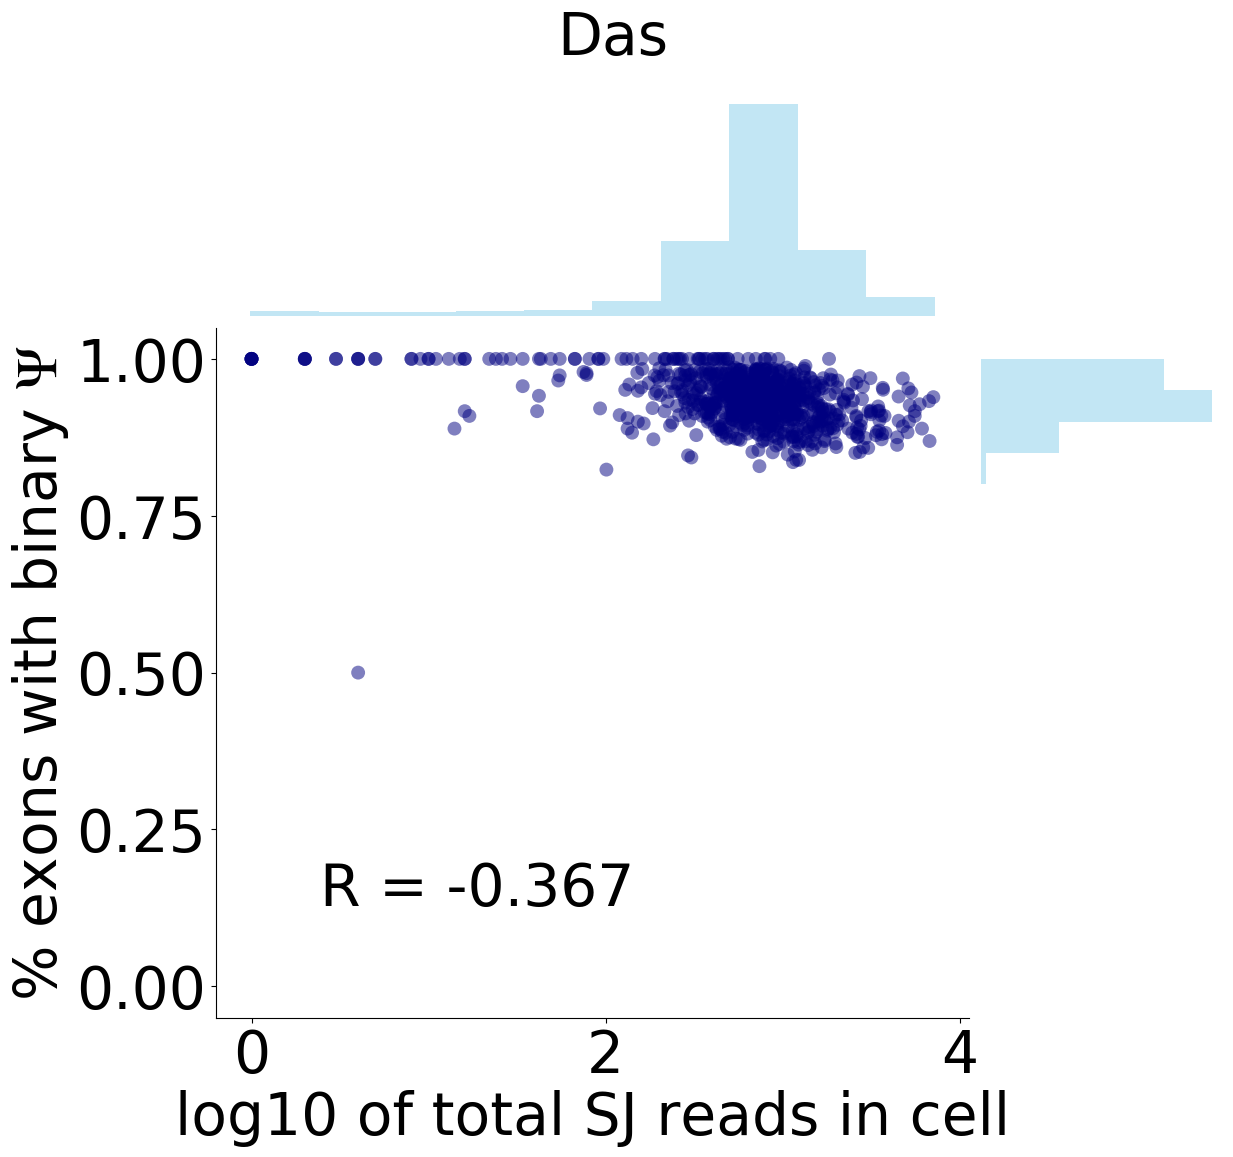

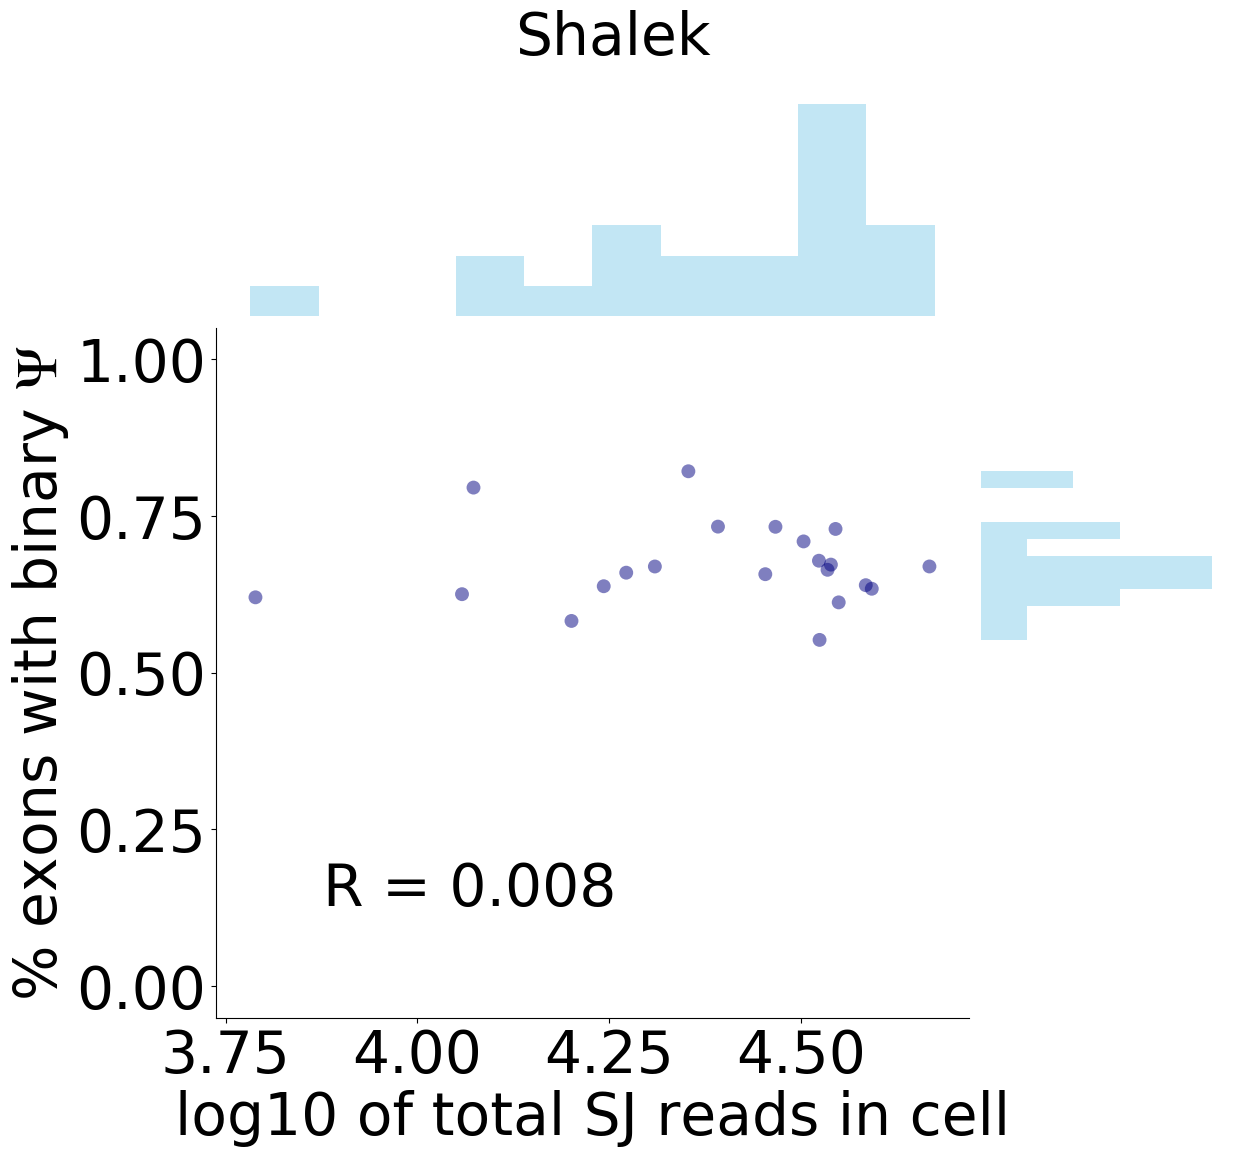

In [15]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(13, 12)

dset_name_list = ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Treutlein', 'Gao', 'Friedman', 'Falcao', 'Das']

pr_bar = []

#xlocations = [10, 1000, 4000, 16000]
filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 'chen_intermediate', 
                                                 #xlocations=xlocations, xlabel='total SJ reads in cell',
                                                xlabel='total SJ reads in cell',
                               plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()

xlocations = [100, 1000,10000]
xtags = ['2', '3', '4']
filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
                                                'lescroart_intermediate',# xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()

xlocations = [1, 10, 100, 1000,10000]
xtags = ['0', '1', '2', '3', '4']
filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
                                                'trapnell_intermediate',# xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()

xlocations = [10000, 100000, 1000000]
xtags = ['4', '5', '6']

filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
                                                'song_intermediate',  #xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()

xlocations = [1, 10, 100, 1000]
xtags = ['0', '1', '2', '3']
filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
                                                'das_intermediate', #xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()


xlocations = [1, 10, 100, 1000]
xtags = ['0', '1', '2', '3']
filtro = (shalek[3].mean(axis=1) >=0.2) & (shalek[3].mean(axis=1) <=0.8)
pr_bar.append(scp.plot_cell_expression_v_binary(shalek[3].loc[filtro], shalek[4].loc[filtro], 'Shalek', 
                                                'shalek_intermediate', #xlocations=xlocations, 
                                                xlabel='log10 of total SJ reads in cell', xtags=xtags,
                              plot_dir = 'polts_review/figure1/', just_show=False))

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

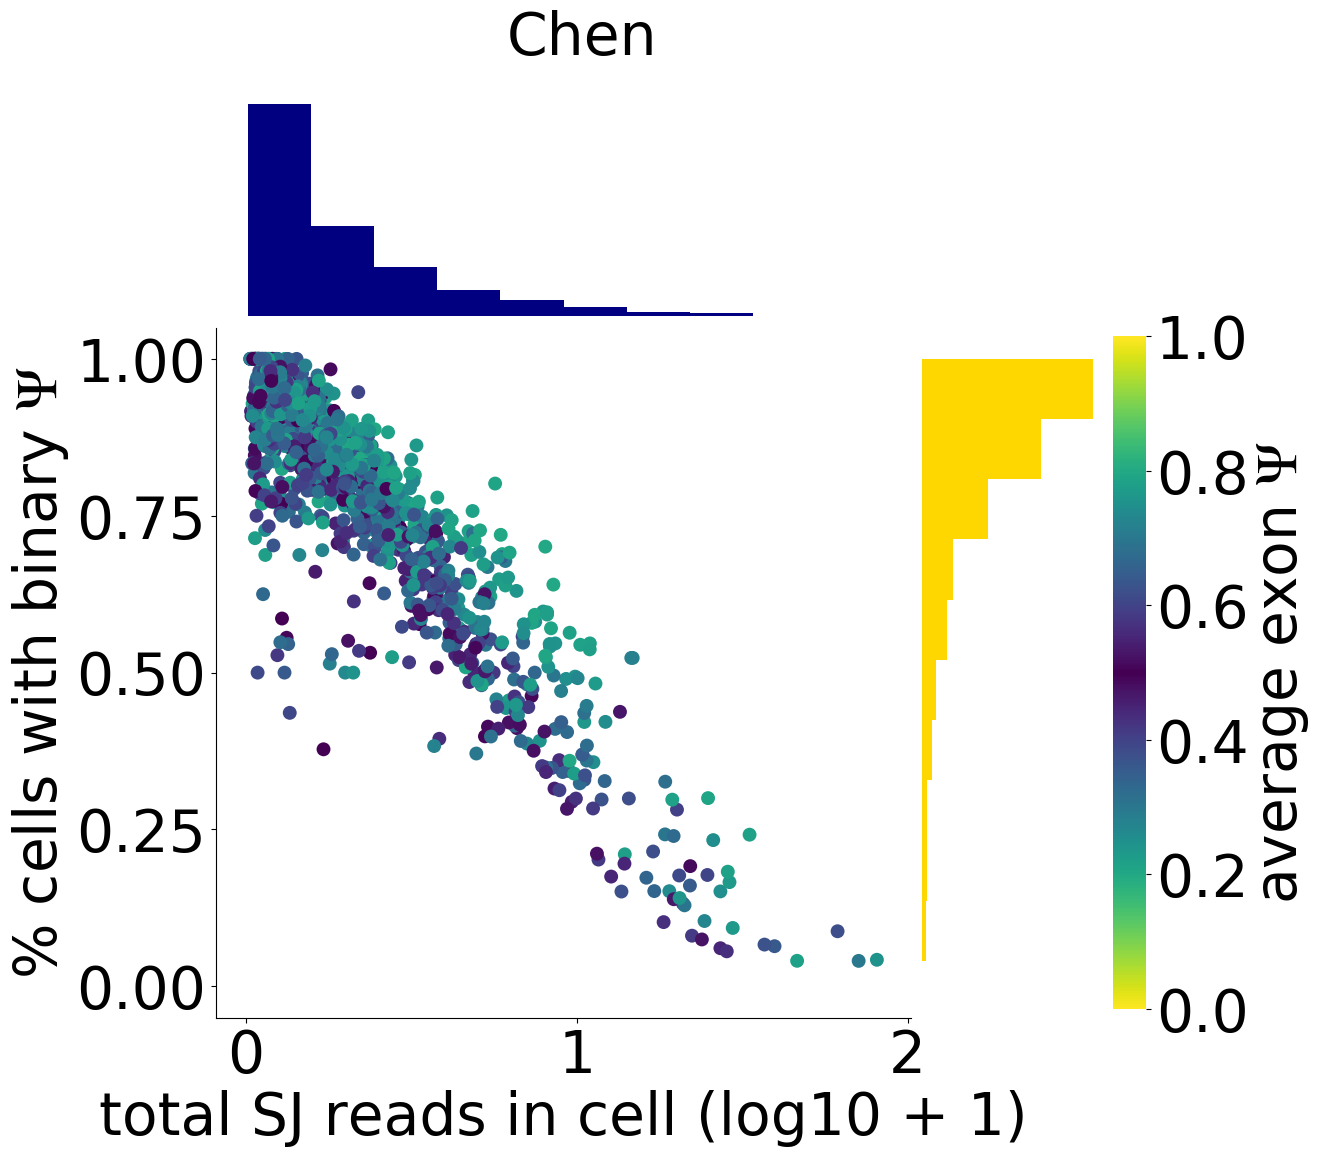

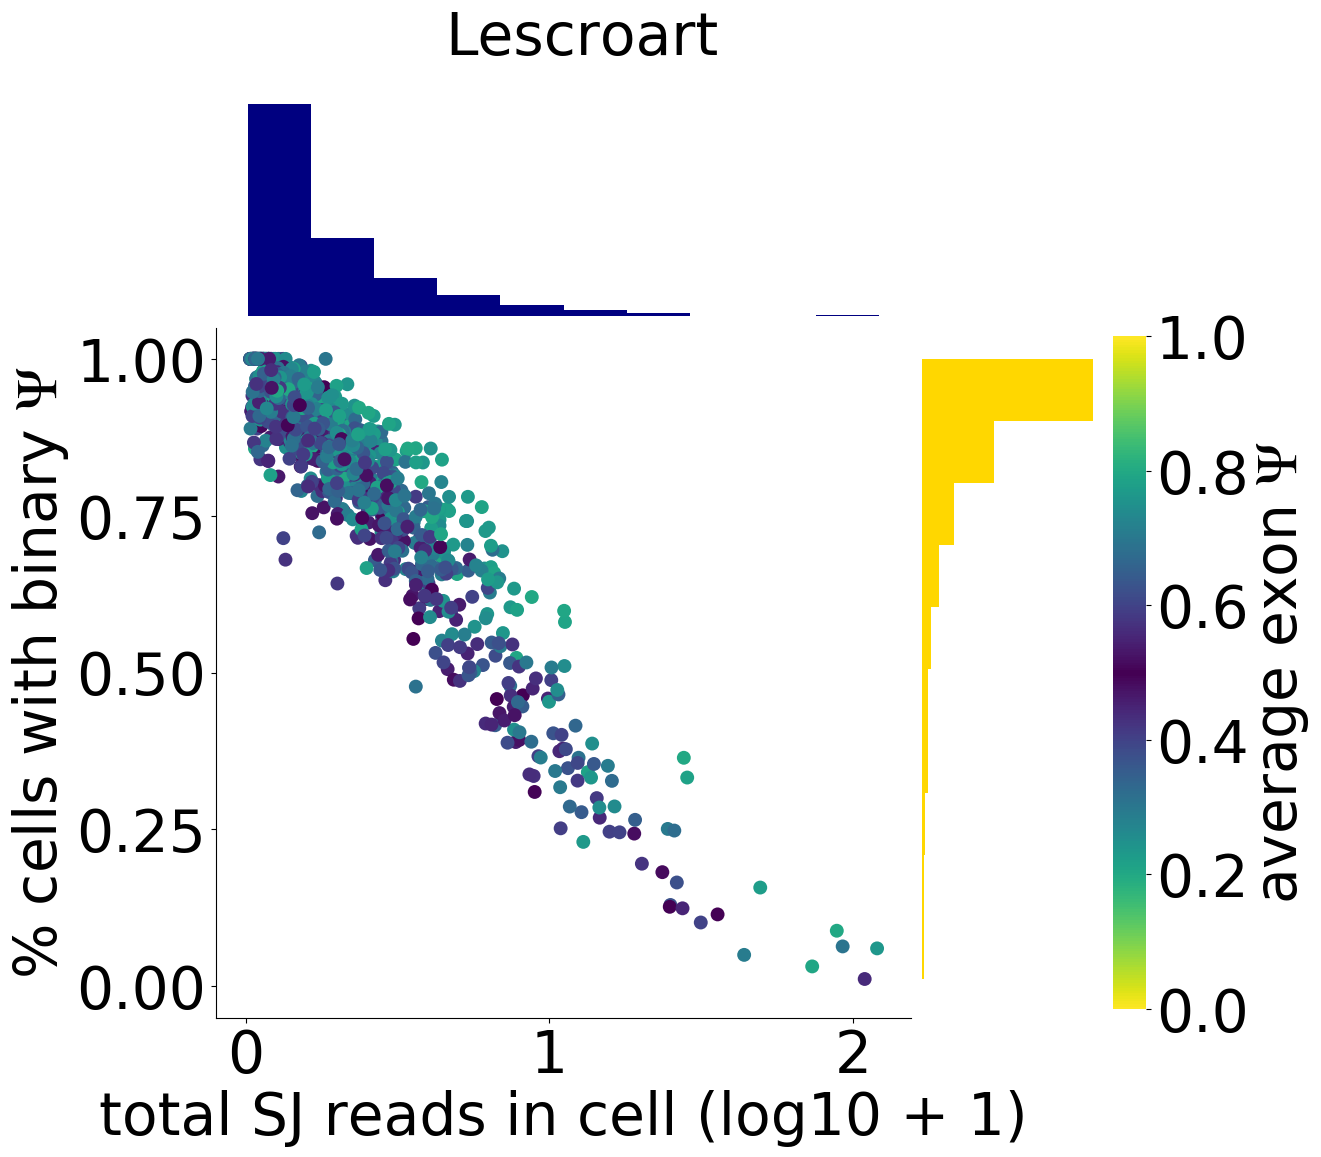

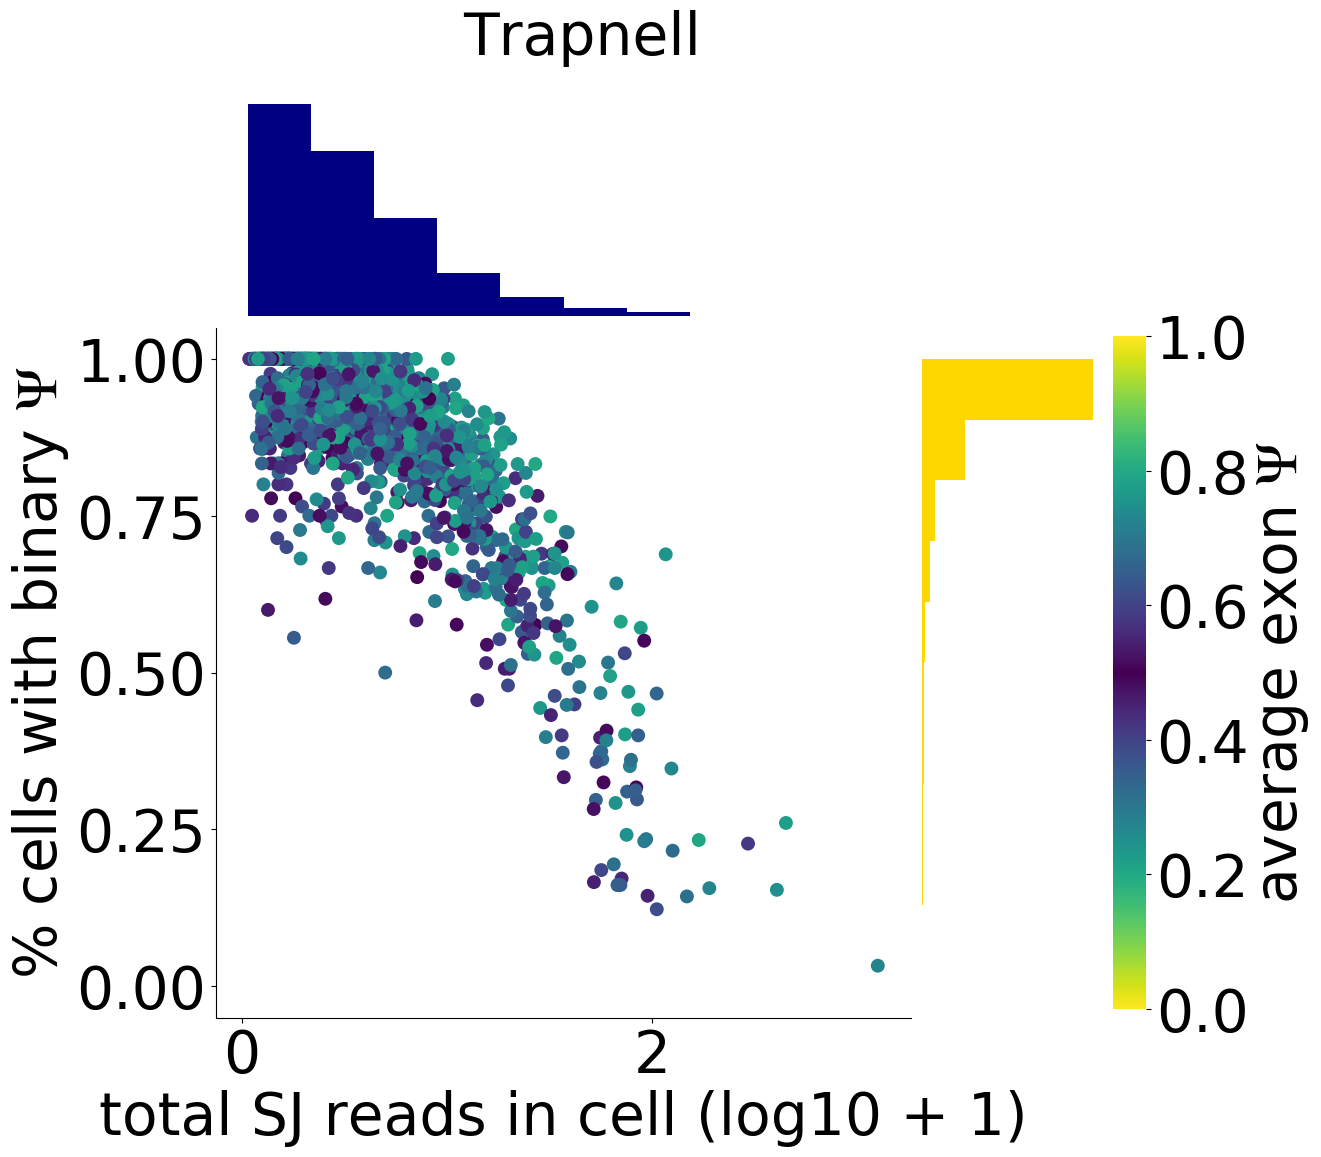

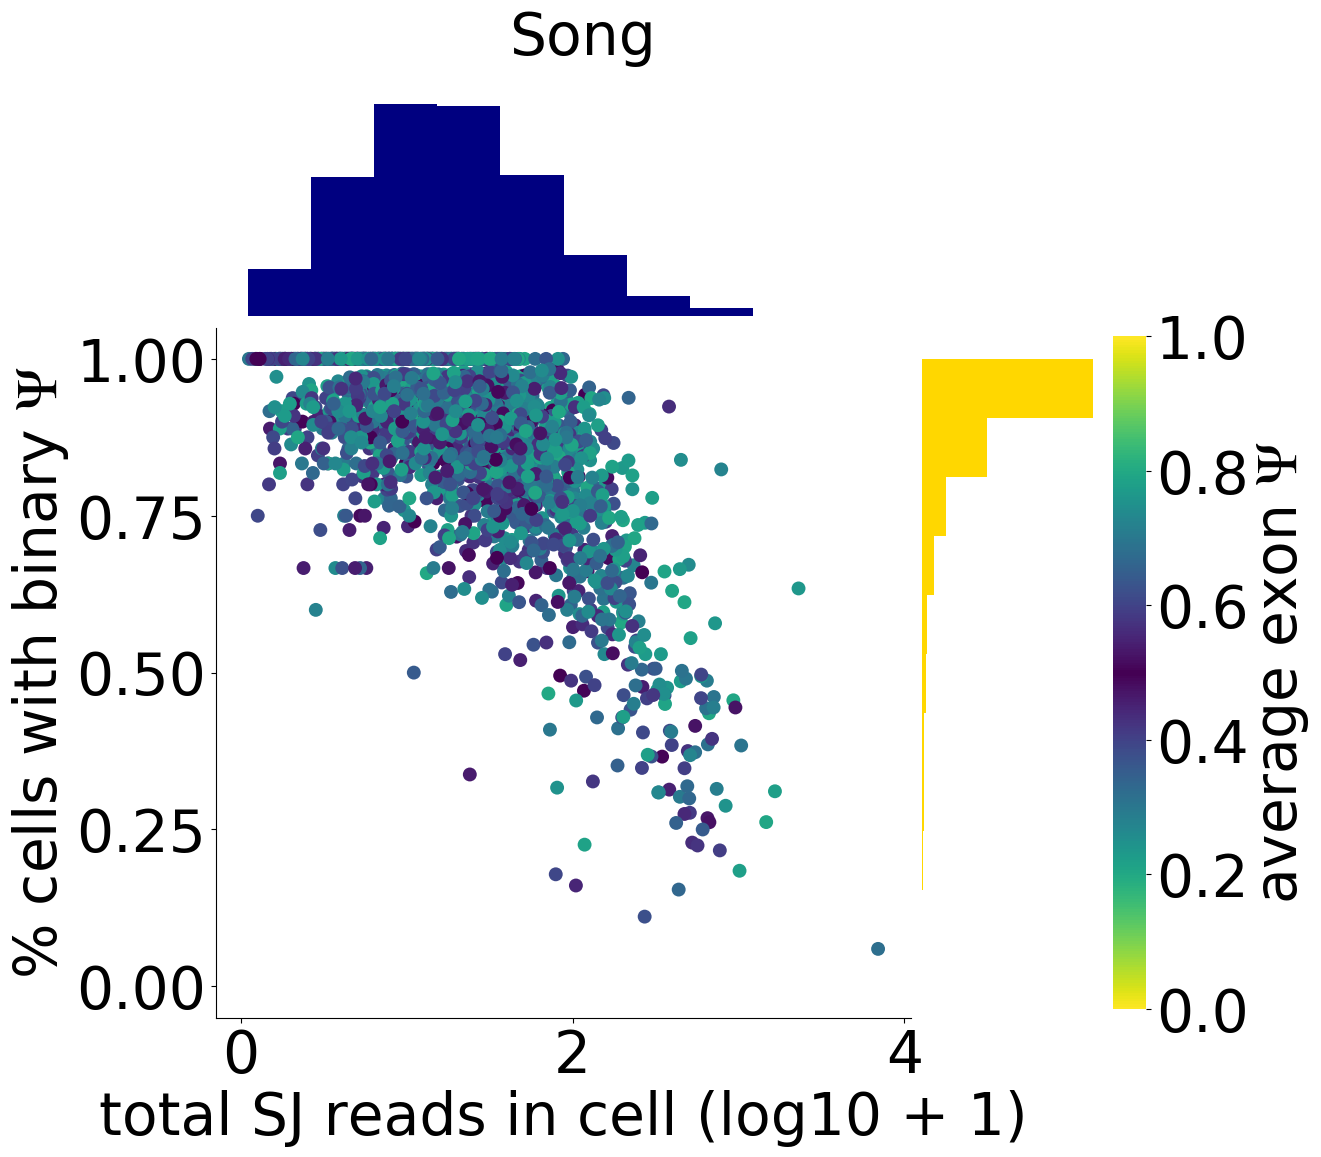

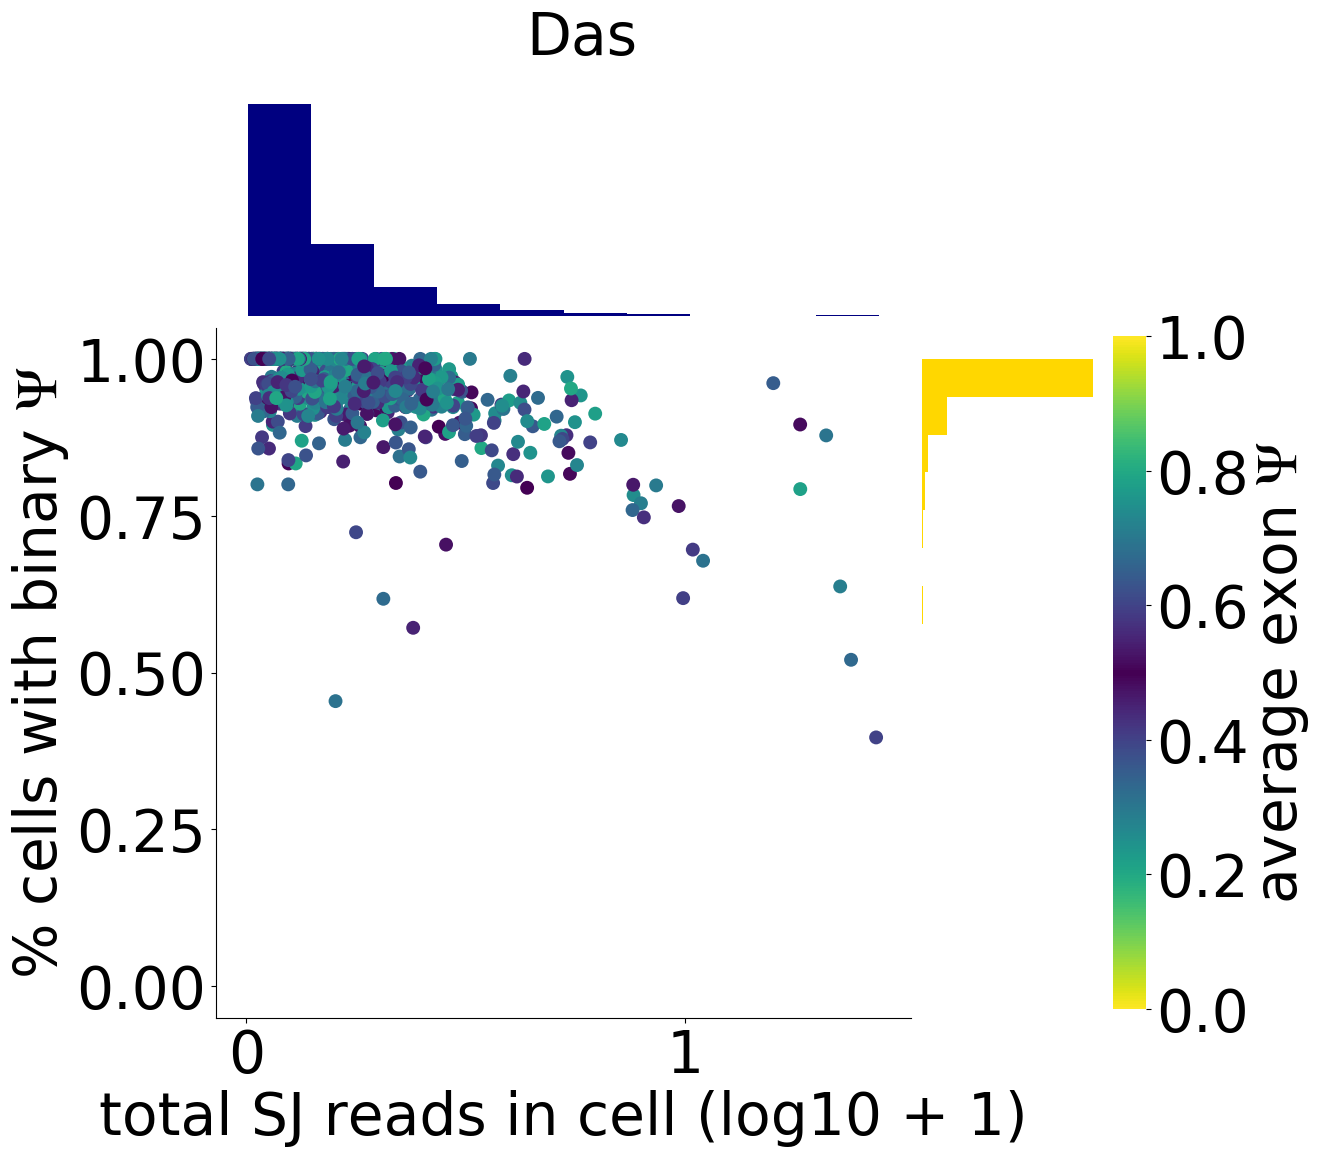

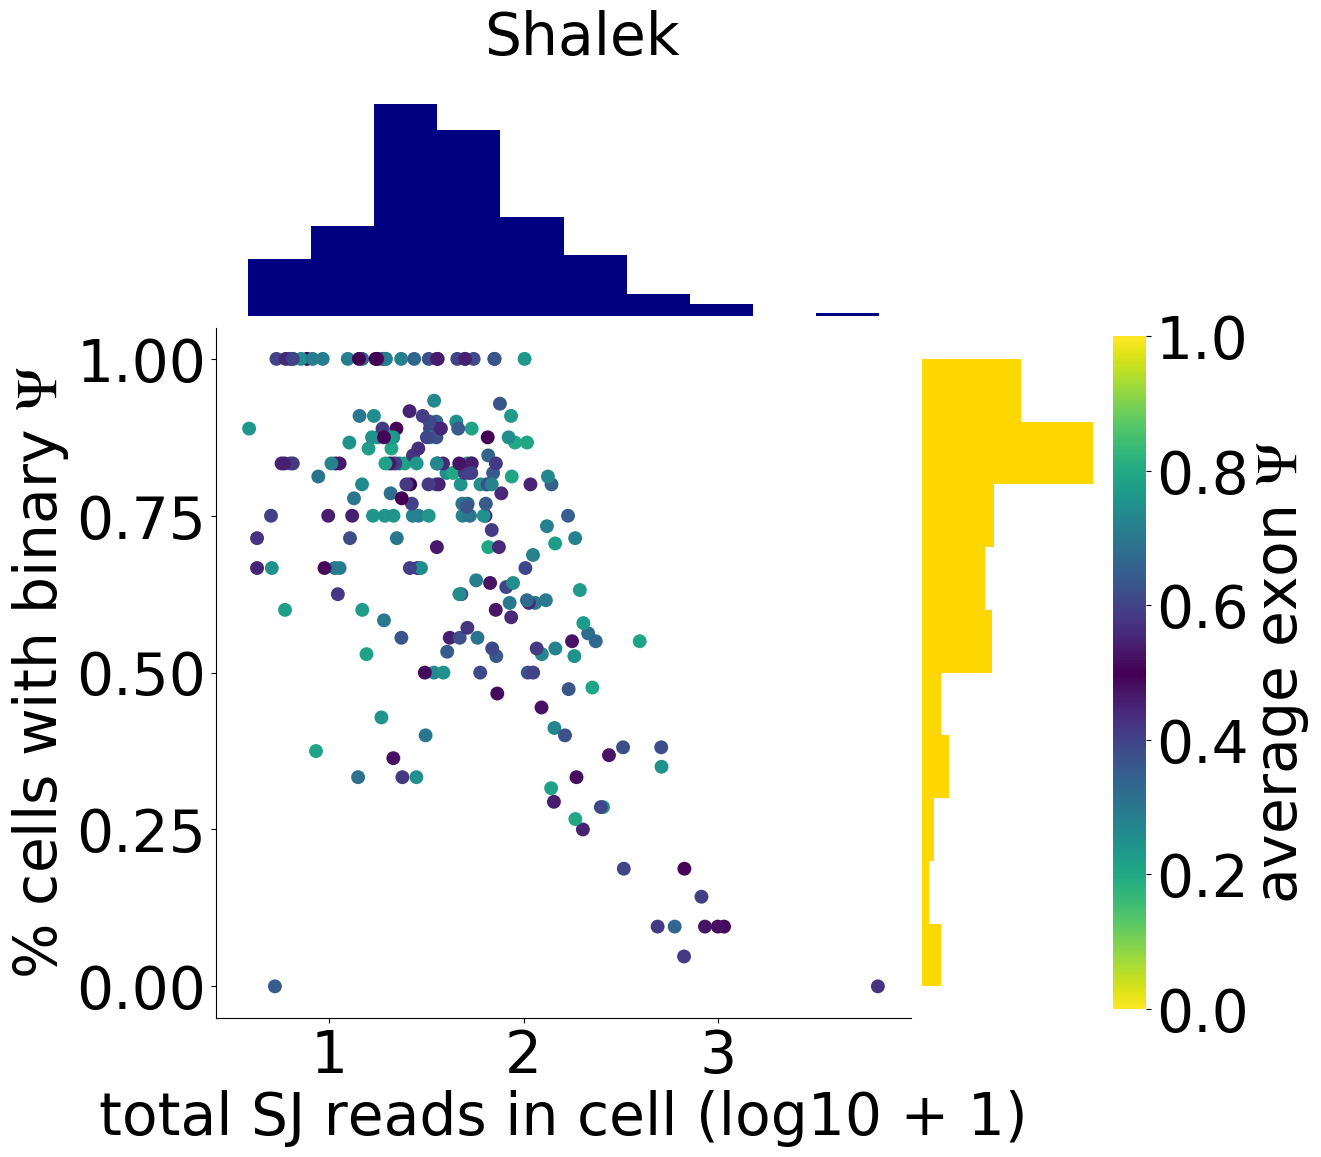

In [57]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(12, 12)
pr_bar2 = []

filtro = (chen[3].mean(axis=1) >=0.2) & (chen[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(chen[3].loc[filtro], chen[4].loc[filtro], 'Chen', 
                                                'chen_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

filtro = (lescroart[3].mean(axis=1) >=0.2) & (lescroart[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(lescroart[3].loc[filtro], lescroart[4].loc[filtro], 'Lescroart', 
                                                'lescroart_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

filtro = (trapnell[3].mean(axis=1) >=0.2) & (trapnell[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(trapnell[3].loc[filtro], trapnell[4].loc[filtro], 'Trapnell', 
                                                'trapnell_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

filtro = (song[3].mean(axis=1) >=0.2) & (song[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(song[3].loc[filtro], song[4].loc[filtro], 'Song', 
                                                'song_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

filtro = (das[3].mean(axis=1) >=0.2) & (das[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(das[3].loc[filtro], das[4].loc[filtro], 'Das', 
                                                'das_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

filtro = (shalek[3].mean(axis=1) >=0.2) & (shalek[3].mean(axis=1) <=0.8)
pr_bar2.append(scp.plot_ase_expression_v_binary(shalek[3].loc[filtro], shalek[4].loc[filtro], 'Shalek', 
                                                'shalek_intermediate', 
                              plot_dir = 'plots_review/figure1/', just_show=False))

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

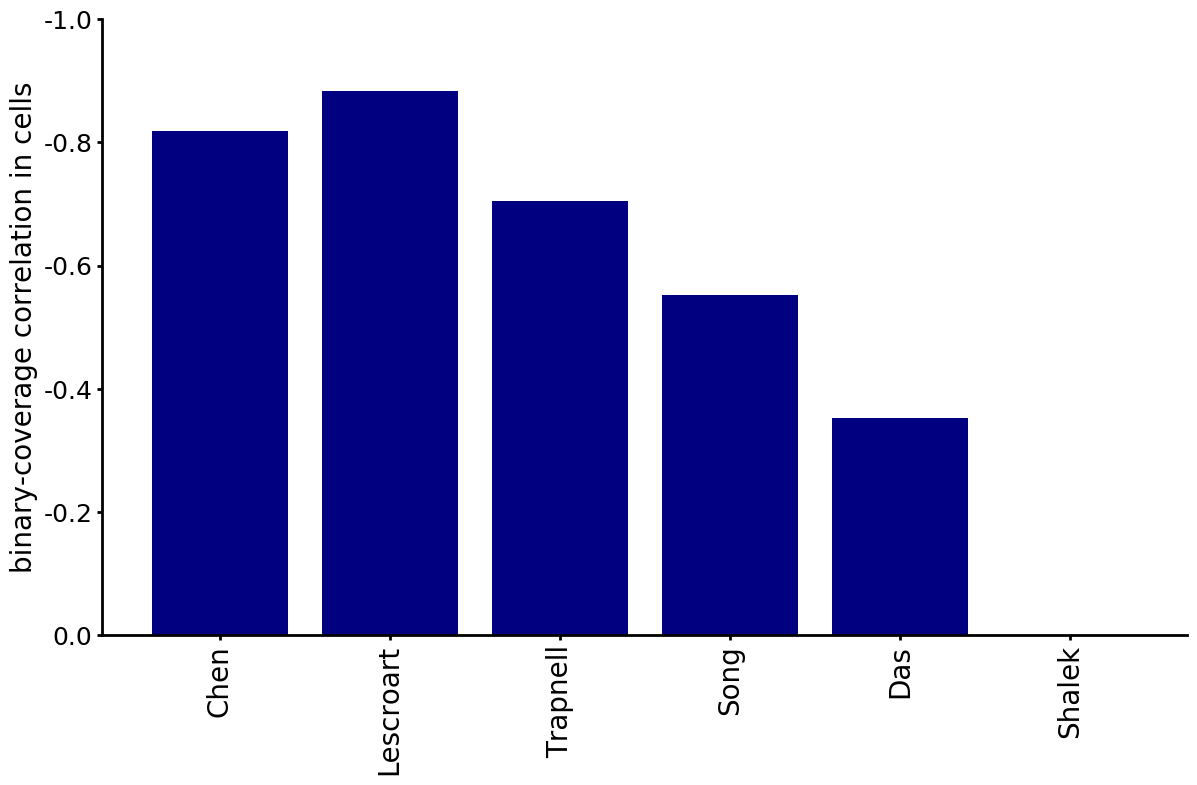

In [58]:
import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

figsize(14,8)

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar([1, 2, 3, 4, 5, 6], -(np.array(pr_bar)), color='navy')
ax.tick_params(labelsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

ax.set_ylim((0,1))

plt.ylabel("binary-coverage correlation in cells", fontsize=20)

locs, labels = plt.yticks()

newLabels = []

newLabels.append('0.0')
newLabels.append('-0.2')
newLabels.append('-0.4')
newLabels.append('-0.6')
newLabels.append('-0.8')
newLabels.append('-1.0')

plt.yticks(locs, newLabels)

plt.xticks([1, 2, 3, 4, 5, 6], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das', 'Shalek'], fontsize=20, rotation='vertical')    



plt.savefig('plots_review/figure1/datasets_cell_correlations.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure1/datasets_cell_correlations.png', dpi=300, bbox_inches='tight')

plt.show()

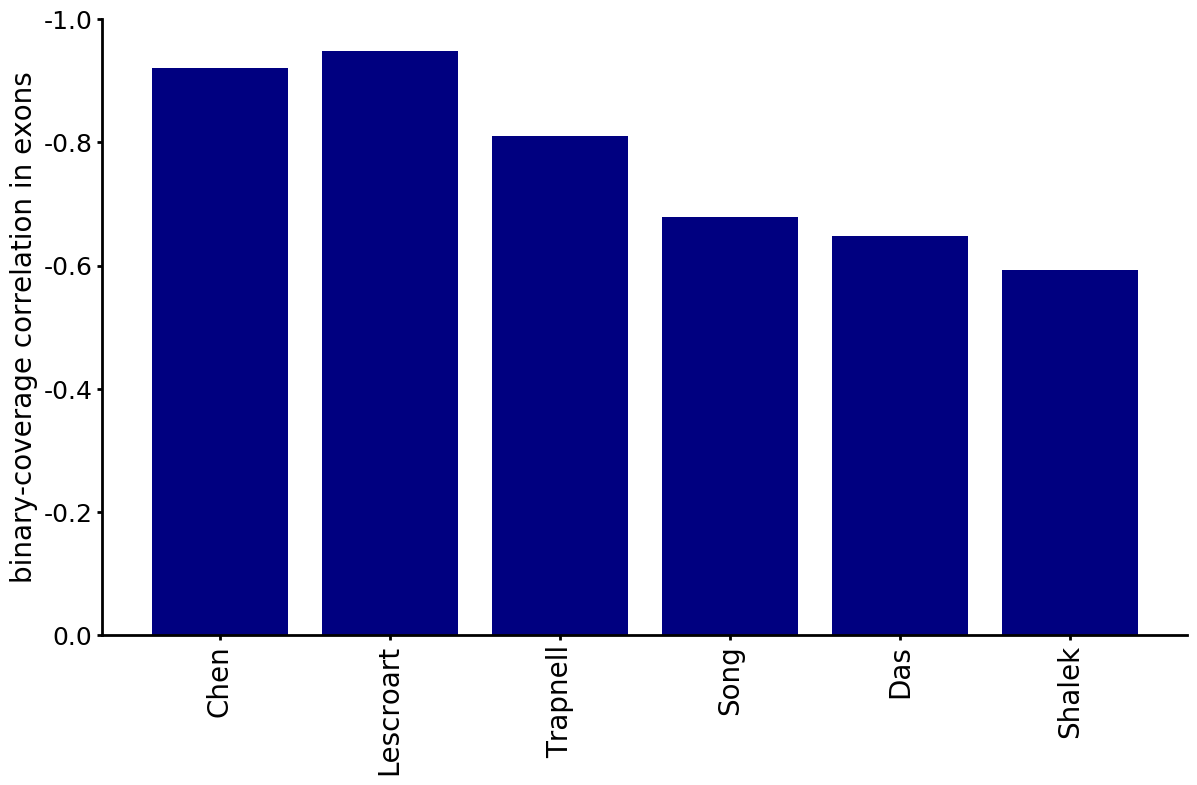

In [59]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(14, 8))

rects = ax.bar([1, 2, 3, 4, 5, 6], -(np.array(pr_bar2)), color='navy')
ax.tick_params(labelsize=18)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

ax.set_ylim((0,1))
plt.ylabel("binary-coverage correlation in exons", fontsize=20)

locs, labels = plt.yticks()

newLabels = []

newLabels.append('0.0')
newLabels.append('-0.2')
newLabels.append('-0.4')
newLabels.append('-0.6')
newLabels.append('-0.8')
newLabels.append('-1.0')

plt.yticks(locs, newLabels)

plt.xticks([1, 2, 3, 4, 5, 6], ['Chen', 'Lescroart', 'Trapnell', 'Song', 'Das', 'Shalek'], fontsize=20, rotation='vertical')    


# plt.show()
plt.savefig('plots_review/figure1/datasets_exon_correlations.svg', bbox_inches='tight')
plt.savefig('plots_review/figure1/datasets_exon_correlations.pdf', bbox_inches='tight')
plt.savefig('plots_review/figure1/datasets_exon_correlations.png', dpi=300, bbox_inches='tight')

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


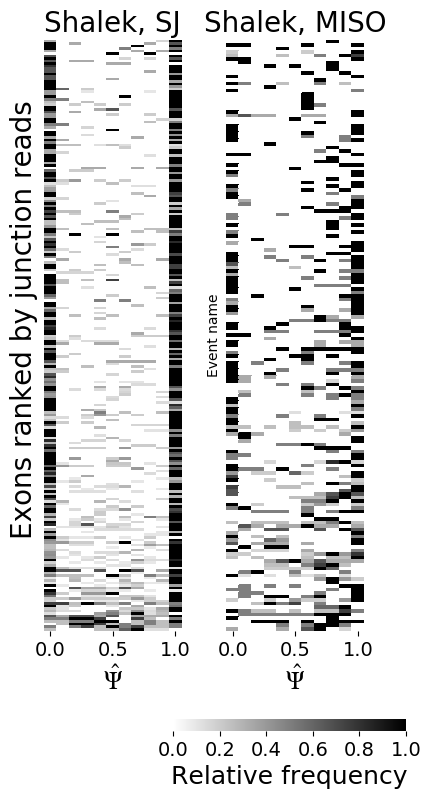

In [18]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

shalek_cells = shalek_PSI_paper.columns[1:18]
ordered_genes = [x for x in shalek_counts_paper[shalek_cells].mean(axis=1).sort_values().index if x in [y.upper() for y in list(shalek_PSI_paper.gene.fillna('nogene'))]]
expression_col = []
for i in shalek_PSI_paper.index:
    
    x = shalek_PSI_paper['gene'].fillna('nogene').loc[i].upper()
    #print(x)
    if x in shalek_counts_paper.index:
        expression_col.append(shalek_counts_paper.loc[x, shalek_cells].mean())
    else:
        expression_col.append(0)
    
    
shalek_PSI_paper['expression'] = expression_col

shalek_hist_complete, shalek_hist_intermediate = scp.get_bins_table(shalek[3], shalek[4], nbins=11)
shalek_hist_complete_paper, shalek_hist_intermediate_paper = scp.get_bins_table(shalek_PSI_paper[shalek_cells], 
                                                                    pd.DataFrame(shalek_PSI_paper.expression), nbins=11)

hist_list = [shalek_hist_intermediate, shalek_hist_intermediate_paper]

dset_name_list = ['Shalek, SJ', 'Shalek, MISO']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_shalekshalek_int',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


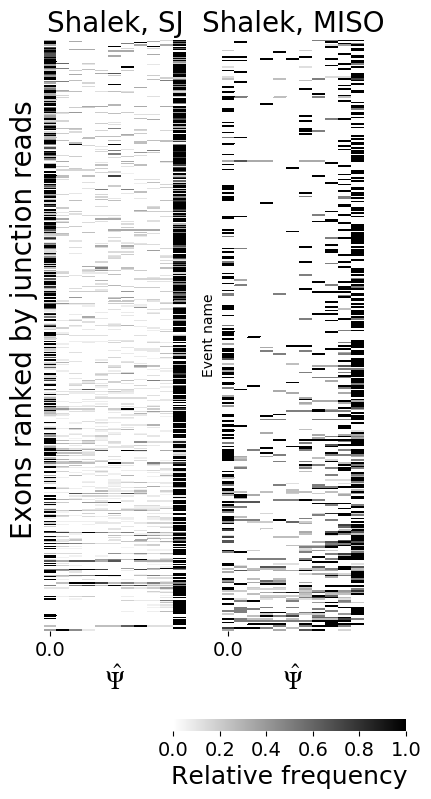

In [19]:
hist_list = [shalek_hist_complete, shalek_hist_complete_paper]

dset_name_list = ['Shalek, SJ', 'Shalek, MISO']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots3/figure1/', plot_name = 'PSI_distributions_shalekshalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20)

plt.show()

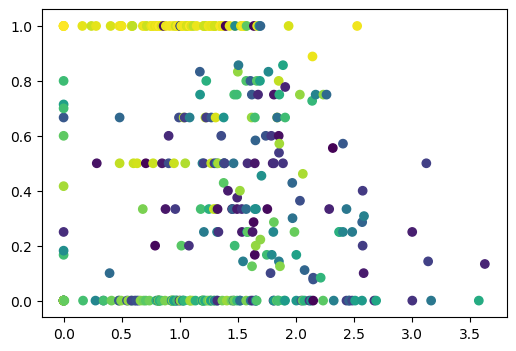

In [20]:
good_exons = shalek_hist_complete_paper.index[shalek_PSI_paper.loc[shalek_hist_complete_paper.index, shalek_cells].isna().mean(axis=1) <= 1.75]
figsize(6,4)
plt.scatter(np.log10(shalek_PSI_paper.loc[good_exons, 'expression']+1), list(np.sum(np.abs(0.5 - shalek_PSI_paper.loc[good_exons, shalek_cells])>=0.45, axis=1) / (17-shalek_PSI_paper.loc[good_exons, shalek_cells].isna().sum(axis=1))),
           c = np.abs(0.5-shalek_PSI_paper.loc[good_exons, shalek_cells].mean(axis=1)), cmap=cm.viridis, vmin=0, vmax=0.5)

Text(0.5, 1.0, 'Shalek paper')

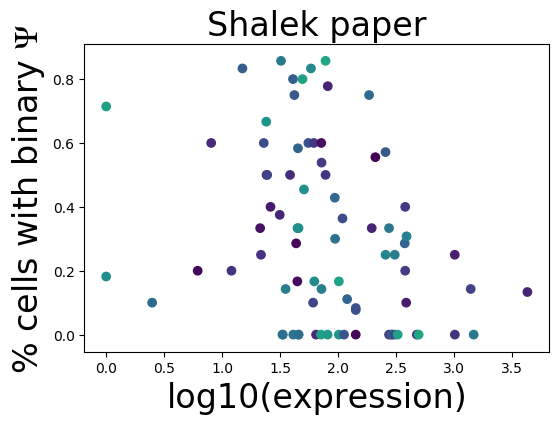

In [21]:
good_exons = shalek_hist_intermediate_paper.index[shalek_PSI_paper.loc[shalek_hist_intermediate_paper.index, shalek_cells].isna().mean(axis=1) <= 0.75]
figsize(6,4)
plt.scatter(np.log10(shalek_PSI_paper.loc[good_exons, 'expression']+1), list(np.sum(np.abs(0.5 - shalek_PSI_paper.loc[good_exons, shalek_cells])>=0.45, axis=1) / (17-shalek_PSI_paper.loc[good_exons, shalek_cells].isna().sum(axis=1))),
           c = np.abs(0.5-shalek_PSI_paper.loc[good_exons, shalek_cells].mean(axis=1)), cmap=cm.viridis, vmin=0, vmax=0.5)
plt.xlabel('log10(expression)', fontsize = 24)
plt.ylabel('% cells with binary $\Psi$', fontsize=24)
plt.title('Shalek paper', fontsize=24)

In [22]:
pearsonr(np.log10(shalek_PSI_paper.loc[good_exons, 'expression']+1), list(np.sum(np.abs(0.5 - shalek_PSI_paper.loc[good_exons, shalek_cells])>=0.45, axis=1) / (17-shalek_PSI_paper.loc[good_exons, shalek_cells].isna().sum(axis=1))))

(-0.31519905330585896, 0.004401806111190617)